# Correspondence Analysis with <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a>

In [1]:
library(ggplot2)

With [`R`](https://cran.r-project.org/), the reference packages for factor analysis are (i) [`FactoMineR`](http://factominer.free.fr/index_fr.html) for the analysis and (ii) [`factoextra`](https://cran.r-project.org/web/packages/factoextra/index.html) for data visualization, both of which we have already used. Here, we will use these packages to perform a correspondence analysis (part 1) and a multiple correspondence analysis (part 2).

In [2]:
library(FactoMineR)
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



## **CA** - Correspondence Analysis

In this section, we look at a dataset listing the division of domestic tasks within a couple. This dataset is available in the `R` package `factoextra`. 

### The data

The data is a contingency table containing 13 housetasks and their repartition in the couple:
- rows are the different tasks
- values are the frequencies of the tasks done :
    - by the _wife_ only,
    - _alternatively_,
    - by the _husband_ only,
    - or _jointly_.
    
The data for this example deal with married women’s integration into the labour market in **1977**. Dual-wage earning, newly-wed, childless couples from five German cities were asked who was responsible for each of the following tasks:

1. taking care of the laundry, 
2. preparing main meals, 
3. making dinner, 
4. preparing breakfast, 
5. tidying the house, 
6. washing dishes, 
7. shopping, 
8. taking care of official matters (tax returns, etc.), 
9. automobile driving, 
10. taking care of financial matters, 
11. taking care of insurance matters, 
12. minor household repairs, 
13. planning trips and vacations.

Complete data were obtained from 223 couples. However, the data reported here relates only to couples who have reached an agreement on repartition (request made independently to the two protagonists).


Further (sociological) information can be found in the original article by Thiessen, Rohlinger and Blasius (1994), and a more detailed description is available on page 379 (13) of the article by [Kroonenberg and Lombardo (1999)](https://www.researchgate.net/profile/Rosaria-Lombardo/publication/28648781_Nonsymmetric_Correspondence_Analysis_A_Tool_for_Analysing_Contingency_TablesWith_a_Dependence_Structure/links/55689ad908aec22683032b28/Nonsymmetric-Correspondence-Analysis-A-Tool-for-Analysing-Contingency-TablesWith-a-Dependence-Structure.pdf?origin=journalDetail&_tp=eyJwYWdlIjoiam91cm5hbERldGFpbCJ9): Non-symmetric correspondence analysis, A tool for analysing contingency tables with a dependence structure. Multivariate Behavioral Research 34(3).

In [3]:
data(housetasks)
housetasks

Wife Alternating Husband Jointly
Laundry    156  14            2       4    
Main_meal  124  20            5       4    
Dinner      77  11            7      13    
Breakfeast  82  36           15       7    
Tidying     53  11            1      57    
Dishes      32  24            4      53    
Shopping    33  23            9      55    
Official    12  46           23      15    
Driving     10  51           75       3    
Finances    13  13           21      66    
Insurance    8   1           53      77    
Repairs      0   3          160       2    
Holidays     0   1            6     153

##### <span style="color:purple">**Todo:** Visualize this contingency table.</span>

- Contingency table can be visualized using the function `balloonplot` from the [`gplots`](https://cran.r-project.org/web/packages/gplots/index.html) package. This function draws a graphical matrix where each cell contains a dot whose size reflects the relative magnitude of the corresponding component;
- It is also possible to visualize a contingency table as a mosaic plot. We can, for instance, do this using the `mosaicplot` function from the [`garphics`](https://cran.r-project.org/web/packages/RGraphics/index.html) package.

In [4]:
library(gplots)
library(graphics)


Attachement du package : ‘gplots’


L'objet suivant est masqué depuis ‘package:stats’:

    lowess




In [ ]:
# solutions/ca/visualize.r

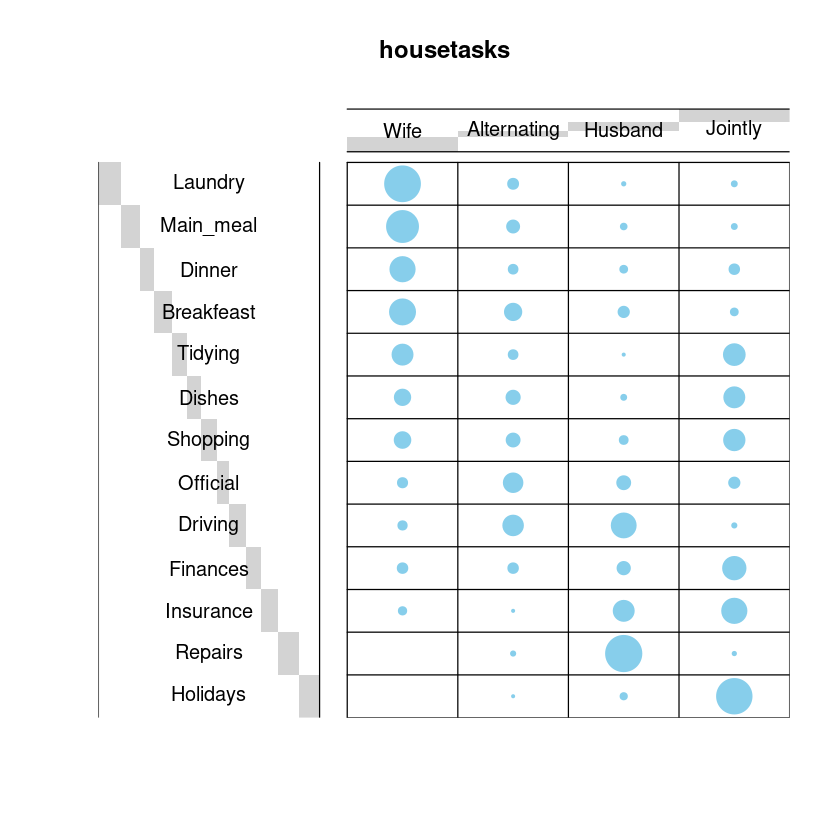

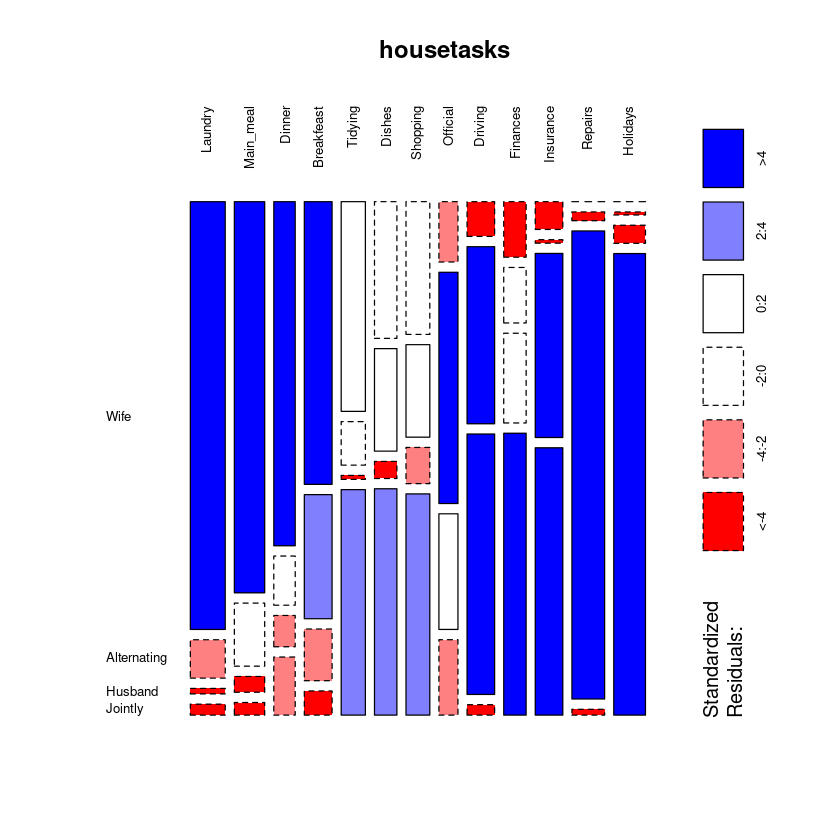

In [5]:
## TO BE COMPLETED ##
dt = as.table(as.matrix(housetasks))

# --- #

balloonplot(t(dt), main ="housetasks", xlab ="", ylab="",
            label = FALSE, show.margins = FALSE)

mosaicplot(dt, shade = TRUE, las=2,
           main = "housetasks")

##### <span style="color:purple">**Question:** Which task did husband and wife agree on most (in terms of distribution)?</span>

Remember that the table only lists the answers for which both members of the couple agreed on the level of allocation.

In [ ]:
# solutions/ca/common.r

In [6]:
## TO BE COMPLETED ##
idx = which.max(rowSums(housetasks))

print(paste("The task with the highest number of joint responses is", row.names(housetasks)[idx], 
            "with", rowSums(housetasks)[idx], "common answers."))

[1] "The task with the highest number of joint responses is Laundry with 176 common answers."


##### <span style="color:purple">**Question:** Is the distribution of household tasks significantly unequal, _i.e._ not evenly distributed?</span>

In [ ]:
# solutions/ca/dependence.r

In [7]:
## TO BE COMPLETED ##
chisq.test(housetasks)


	Pearson's Chi-squared test

data:  housetasks
X-squared = 1944.5, df = 36, p-value < 2.2e-16


### Correspondence Analysis

With the `CA` function of [`FactoMineR`](http://factominer.free.fr/index_fr.html), we can perform Correspondence Analysis.

In [10]:
res.ca = CA(housetasks, graph=FALSE)
print(res.ca)
res.ca$eig

**Results of the Correspondence Analysis (CA)**
The row variable has  13  categories; the column variable has 4 categories
The chi square of independence between the two variables is equal to 1944.456 (p-value =  0 ).
*The results are available in the following objects:

   name              description                   
1  "$eig"            "eigenvalues"                 
2  "$col"            "results for the columns"     
3  "$col$coord"      "coord. for the columns"      
4  "$col$cos2"       "cos2 for the columns"        
5  "$col$contrib"    "contributions of the columns"
6  "$row"            "results for the rows"        
7  "$row$coord"      "coord. for the rows"         
8  "$row$cos2"       "cos2 for the rows"           
9  "$row$contrib"    "contributions of the rows"   
10 "$call"           "summary called parameters"   
11 "$call$marge.col" "weights of the columns"      
12 "$call$marge.row" "weights of the rows"         


eigenvalue percentage of variance cumulative percentage of variance
dim 1 0.5428893  48.69222                48.69222                        
dim 2 0.4450028  39.91269                88.60491                        
dim 3 0.1270484  11.39509               100.00000

##### <span style="color:purple">**Question:** How many dimensions should we keep for further analysis?</span>

In [ ]:
# solutions/ca/dimensions.r

In [ ]:
## TO BE COMPLETED ##

##### <span style="color:purple">**Todo:** View the biplot.</span>

- What conclusions can you draw?
- One can use the `fviz_ca_biplot` function.

In [ ]:
# solutions/ca/biplot.r

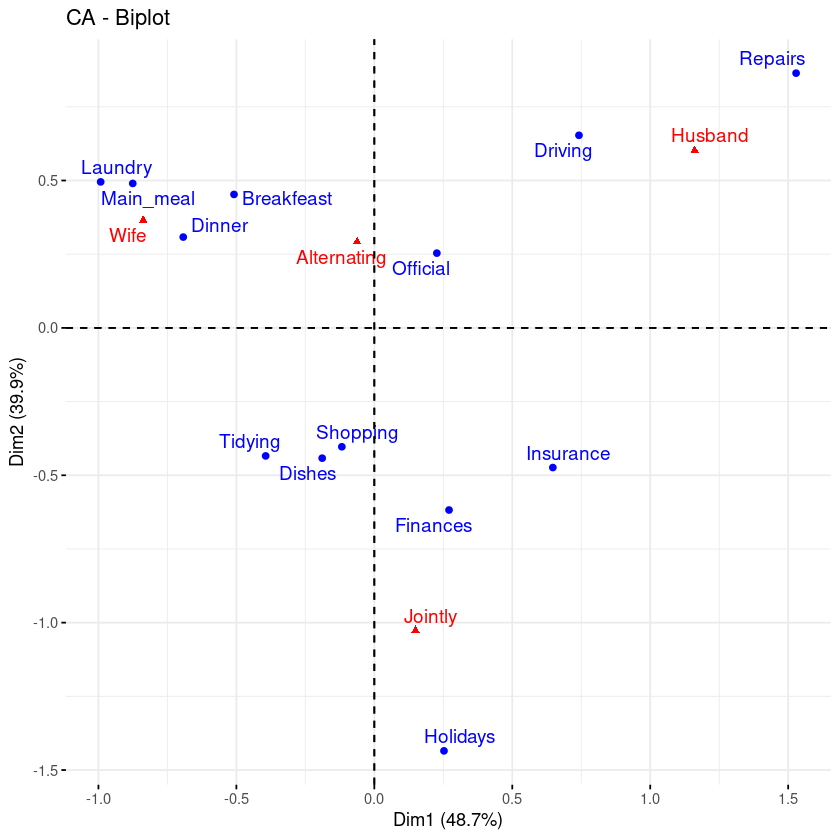

In [9]:
## TO BE COMPLETED ##
# repel= TRUE: to avoid text overlapping (slow if many point)
fviz_ca_biplot(res.ca, repel=TRUE)

### Quality of representation

##### <span style="color:purple">**Question:** Which task is best represented by axis 1?</span>

In [ ]:
# solutions/ca/representation.r

In [11]:
## TO BE COMPLETED ##
# cos2: quality of representation of rows
res.ca$row$cos2

# -- #
print("")

i = 1
idx = which.max(res.ca$row$cos2[,i])

print(paste("The", row.names(housetasks)[idx], "task is best represented by axis", i))

Dim 1      Dim 2      Dim 3      
Laundry    0.73998741 0.18455213 0.075460467
Main_meal  0.74160285 0.23235928 0.026037873
Dinner     0.77664011 0.15370323 0.069656660
Breakfeast 0.50494329 0.40023001 0.094826699
Tidying    0.43981243 0.53501508 0.025172490
Dishes     0.11811778 0.64615253 0.235729693
Shopping   0.06365362 0.74765514 0.188691242
Official   0.05304464 0.06642648 0.880528877
Driving    0.43201860 0.33522911 0.232752289
Finances   0.16067678 0.83666958 0.002653634
Insurance  0.57601197 0.30880208 0.115185951
Repairs    0.70673575 0.22587147 0.067392778
Holidays   0.02979239 0.96235977 0.007847841

[1] ""
[1] "The Dinner task is best represented by axis 1"


##### <span style="color:purple">**Question:** Which task is best represented in the CA plan? Which is least well represented?</span>

- View the projection of tasks in the CA plane colored according to the quality of their representation.
- One may use the `fviz_ca_row` function

In [ ]:
# solutions/ca/row_representation.r

In [23]:
res.ca$row$cos2[,c(1,2)]

Dim 1      Dim 2     
Laundry    0.73998741 0.18455213
Main_meal  0.74160285 0.23235928
Dinner     0.77664011 0.15370323
Breakfeast 0.50494329 0.40023001
Tidying    0.43981243 0.53501508
Dishes     0.11811778 0.64615253
Shopping   0.06365362 0.74765514
Official   0.05304464 0.06642648
Driving    0.43201860 0.33522911
Finances   0.16067678 0.83666958
Insurance  0.57601197 0.30880208
Repairs    0.70673575 0.22587147
Holidays   0.02979239 0.96235977

[1] "In the CA plan, the Finances task is the best represented"
[1] "In the CA plan, the Official task is the worst represented"


Representation
Laundry    0.9245395     
Main_meal  0.9739621     
Dinner     0.9303433     
Breakfeast 0.9051733     
Tidying    0.9748275     
Dishes     0.7642703     
Shopping   0.8113088     
Official   0.1194711     
Driving    0.7672477     
Finances   0.9973464     
Insurance  0.8848140     
Repairs    0.9326072     
Holidays   0.9921522

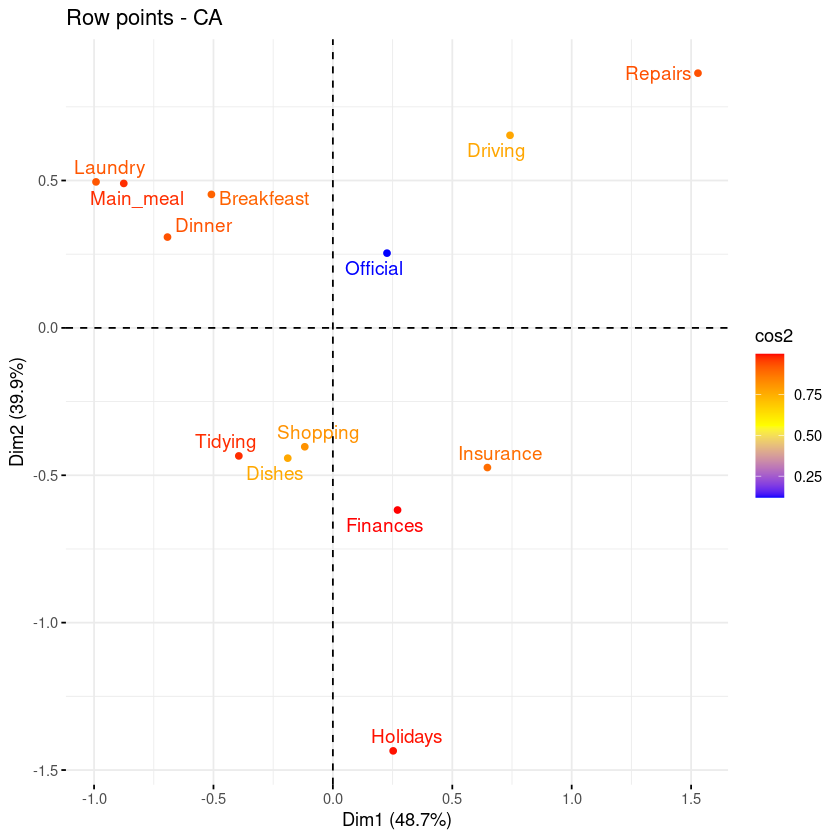

In [12]:
## TO BE COMPLETED ##
idx = which.max(rowSums(res.ca$row$cos2[,c(1,2)]))
print(paste("In the CA plan, the", row.names(housetasks)[idx], "task is the best represented"))

idx = which.min(rowSums(res.ca$row$cos2[,c(1,2)]))
print(paste("In the CA plan, the", row.names(housetasks)[idx], "task is the worst represented"))

# --- #

quality = data.frame(rowSums(res.ca$row$cos2[,c(1,2)]))
colnames(quality) = "Representation"
quality

# --- #

# Color by cos2 values: quality on the factor map
fviz_ca_row(res.ca, col.row = "cos2",
             gradient.cols = c("blue", "yellow", "red"), 
             repel = TRUE)

##### <span style="color:purple">**Todo:** Carry out the same study with the columns in the table.</span>

In [ ]:
# solutions/ca/col_representation.r

In [24]:
res.ca$col$cos2[,c(1,2)]

Dim 1       Dim 2    
Wife        0.801875947 0.1524482
Alternating 0.004779897 0.1051016
Husband     0.772026244 0.2075420
Jointly     0.020705858 0.9772939

[1] "In the CA plan, Jointly is the best represented"
[1] "In the CA plan, Alternating is the worst represented"


Representation
Wife        0.9543242     
Alternating 0.1098815     
Husband     0.9795683     
Jointly     0.9979998

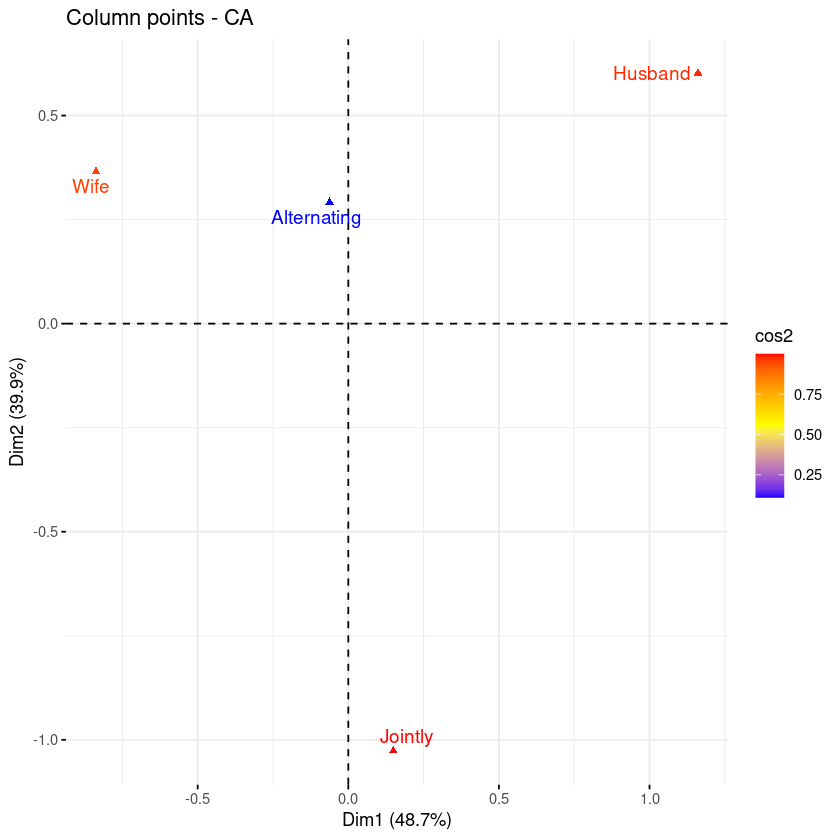

In [19]:
## TO BE COMPLETED ##
idx = which.max(rowSums(res.ca$col$cos2[,c(1,2)]))
print(paste("In the CA plan,", colnames(housetasks)[idx], "is the best represented"))

idx = which.min(rowSums(res.ca$col$cos2[,c(1,2)]))
print(paste("In the CA plan,", colnames(housetasks)[idx], "is the worst represented"))

# --- #

quality = data.frame(rowSums(res.ca$col$cos2[,c(1,2)]))
colnames(quality) = "Representation"
quality

# --- #

# Color by cos2 values: quality on the factor map
fviz_ca_col(res.ca, col.col = "cos2",
             gradient.cols = c("blue", "yellow", "red"), 
             repel = TRUE)

### Contribution to the dimensions

##### <span style="color:purple">**Question:** Which task contributes most to axis 2?</span>

In [ ]:
# solutions/ca/contribution.r

In [28]:
## TO BE COMPLETED ##
# Contribution of rows (in %) to the definition of the dimensions.
res.ca$row$contrib

# -- #
print("")

i = 2
idx = which.max(res.ca$row$contrib[,i])

print(paste("The", row.names(housetasks)[idx], "task contributes most to dimension", i))

Dim 1      Dim 2      Dim 3      
Laundry    18.2867003  5.5638913  7.96842443
Main_meal  12.3888433  4.7355230  1.85868941
Dinner      5.4713982  1.3210221  2.09692603
Breakfeast  3.8249284  3.6986131  3.06939857
Tidying     1.9983518  2.9656441  0.48873403
Dishes      0.4261663  2.8441170  3.63429434
Shopping    0.1755248  2.5151584  2.22335679
Official    0.5207837  0.7956201 36.94038942
Driving     8.0778371  7.6468564 18.59638635
Finances    0.8750075  5.5585460  0.06175066
Insurance   6.1470616  4.0203590  5.25263863
Repairs    40.7300940 15.8806509 16.59639139
Holidays    1.0773030 42.4539986  1.21261994

[1] ""
[1] "The Holidays task contributes most to dimension 2"


##### <span style="color:purple">**Todo:** How do each of the tasks contribute to axes 1 and 2?</span>

- Draw a bar plot of row contributions, to dimension 1 on the one hand, to dimension 2 on the other, and to the combination of these two dimensions (CA map).
- One can use the `fviz_contrib` function.

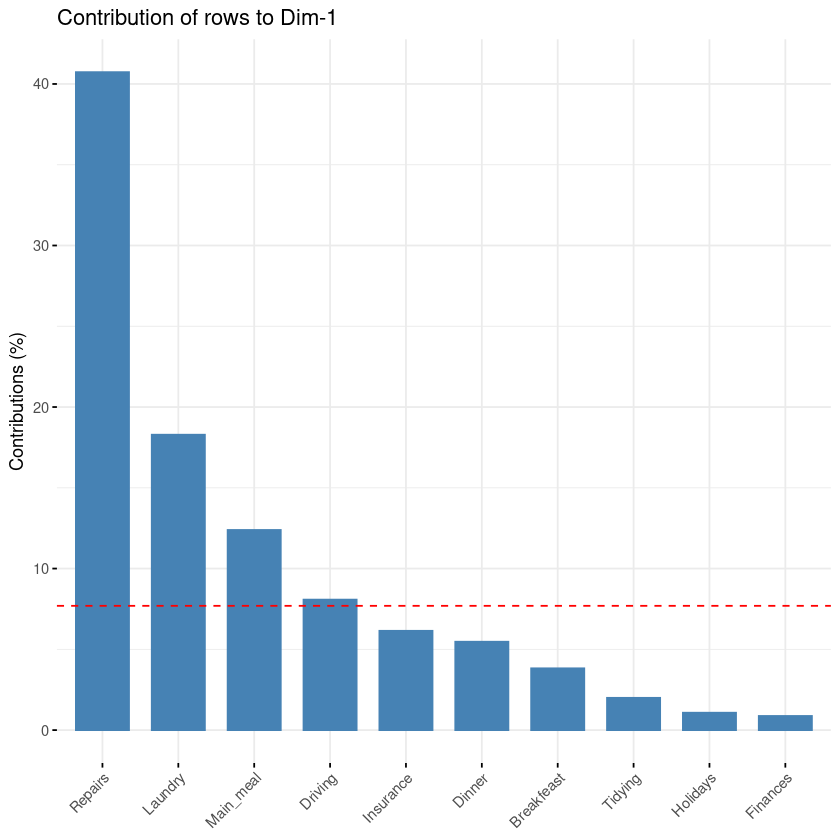

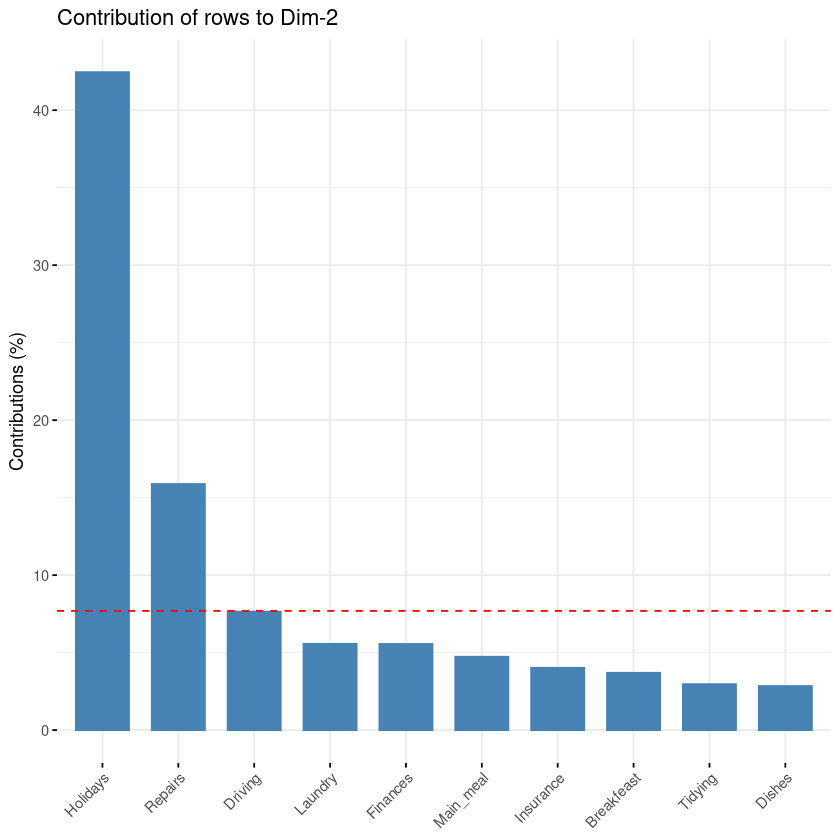

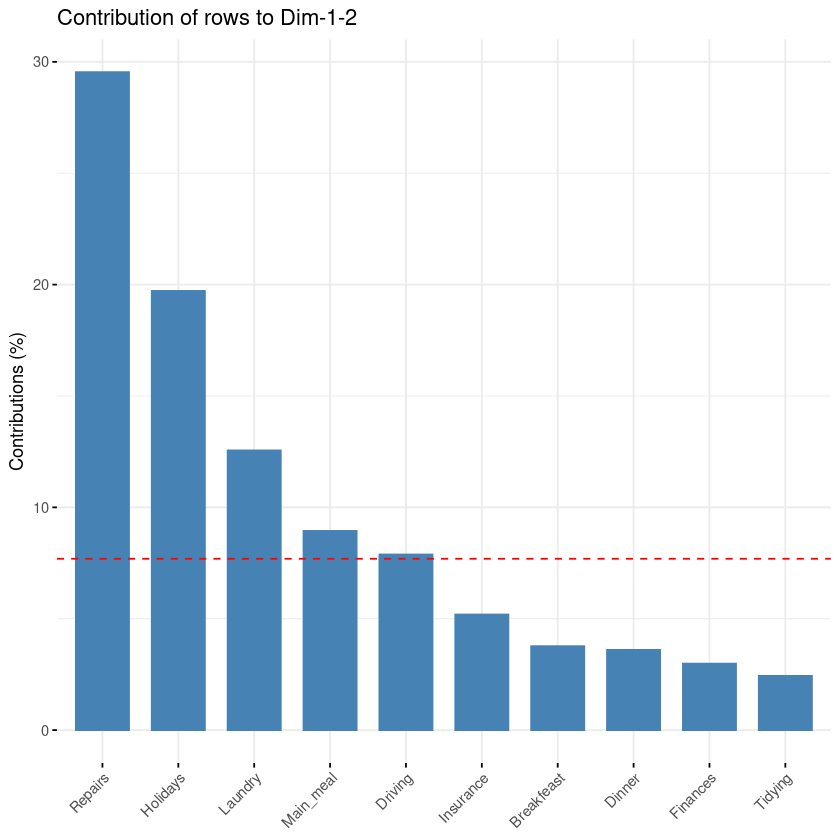

In [33]:
# solutions/ca/row_contribution.r
# Contributions of rows to dimension 1
fviz_contrib(res.ca, choice = "row", axes = 1, top = 10)

# Contributions of rows to dimension 2
fviz_contrib(res.ca, choice = "row", axes = 2, top = 10)

# Total contribution to dimension 1 and 2
fviz_contrib(res.ca, choice = "row", axes = 1:2, top = 10)

In [ ]:
## TO BE COMPLETED ##

##### <span style="color:purple">**Todo:** Interpret the axes</span>

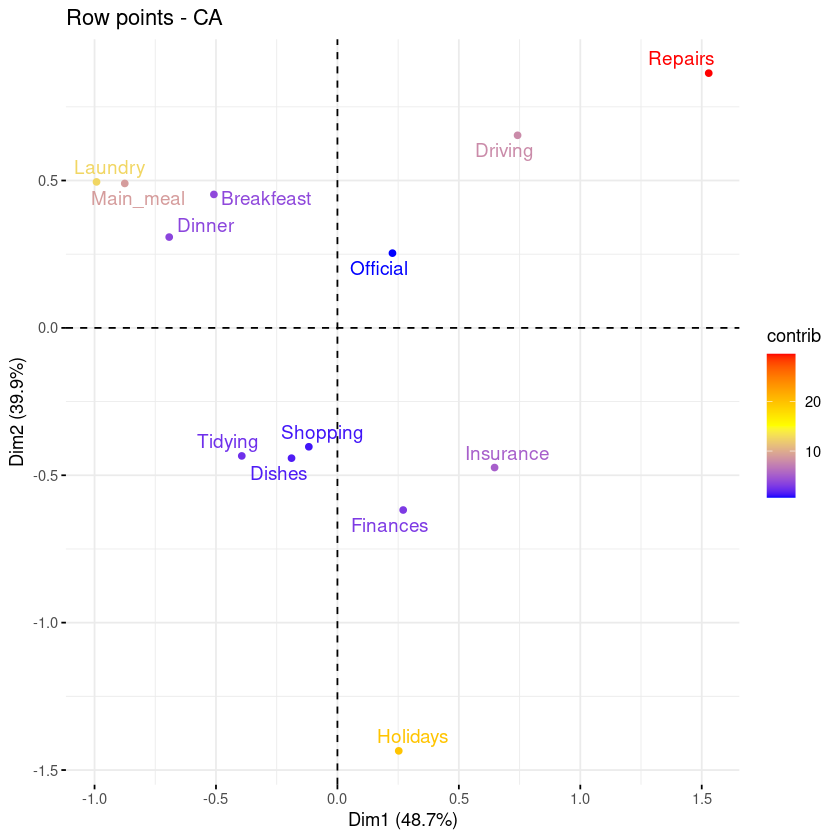

In [34]:
# solutions/ca/axes.r
# Change the color by contrib values
fviz_ca_row(res.ca, col.row = "contrib",
             gradient.cols = c("blue", "yellow", "red"), 
             repel = TRUE)

In [ ]:
## TO BE COMPLETED ##

##### <span style="color:purple">**Todo:** View the contribution of each column to each dimension.</span>

- use the `corrplot` function the eponymous package to highlight the most contributing row points for each dimension:

In [35]:
library(corrplot)

corrplot 0.92 loaded



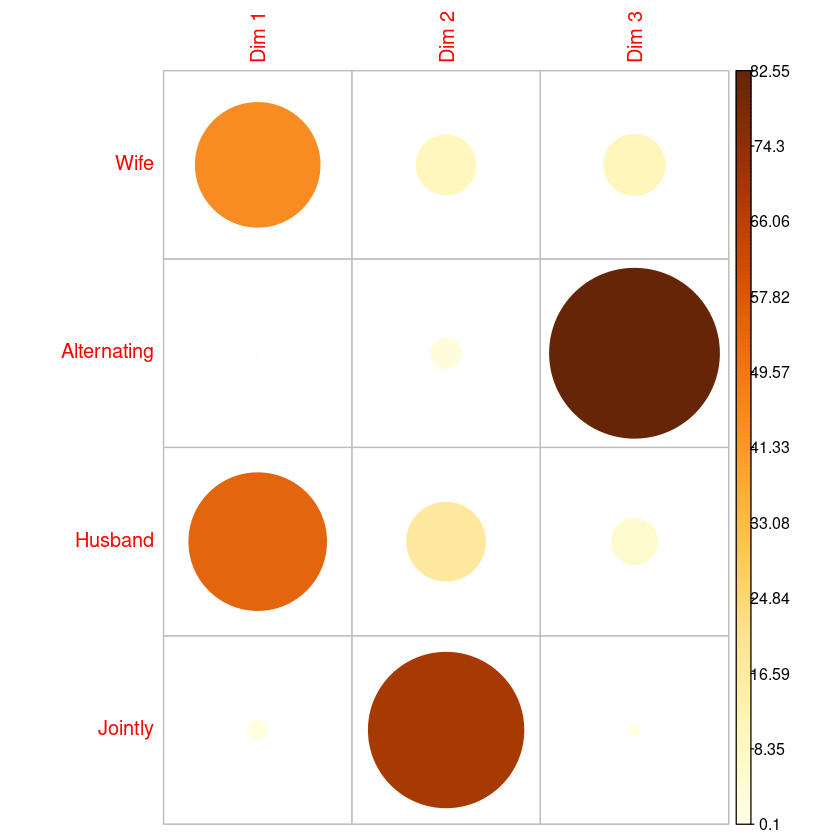

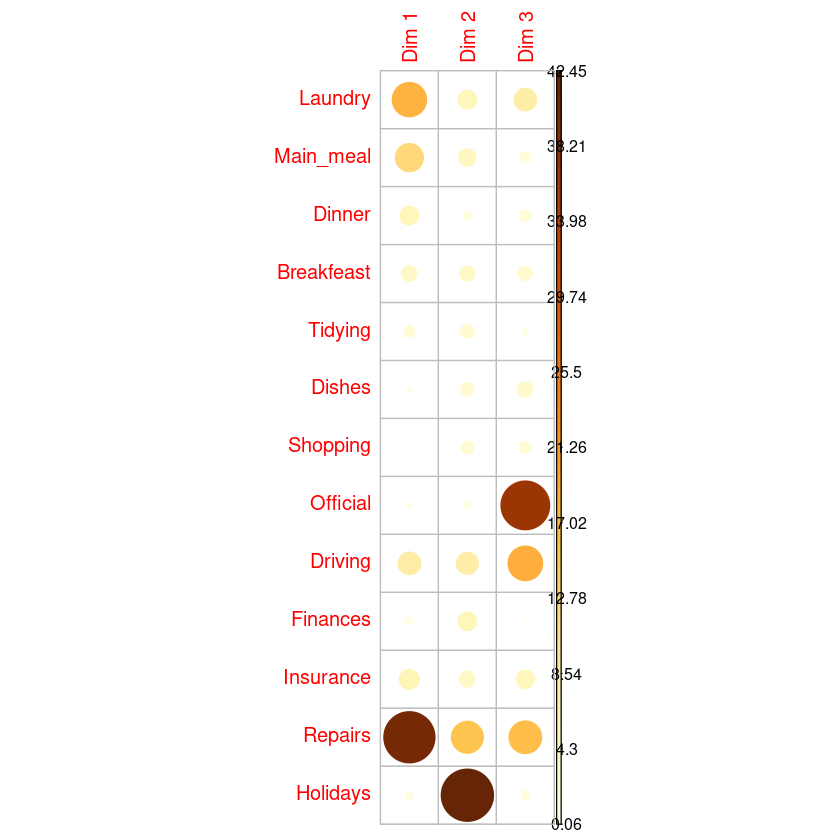

In [37]:
# solutions/ca/col_contrib.r
corrplot(res.ca$col$contrib, is.corr=FALSE)   

corrplot(res.ca$row$contrib, is.corr=FALSE)   

In [ ]:
## TO BE COMPLETED ##

---

## **MCA** - Multiple Correspondence Analysis

We now focus on the Multiple Correspondence Analysis, extension of the simple Correspondence Analysis (CA).

### The data

We are going to use data on leisure activities. These data are taken from a 2003 INSEE survey on identity construction, known as the "life history" survey, in which 8403 people were interviewed.

This study includes 2 types of variable:
- Which of the following leisure activities do you practice regularly? Reading, Listening to music, Cinema, Shows, Exhibitions, Computer, Sport, Walking, Travel, Playing a musical instrument, Collecting, Voluntary work, Home improvement, Gardening, Knitting, Cooking, Fishing, Number of hours of TV per day on average
- Additional variables (4 questions): sex, age, profession, marital status.

This data is available in the "hobbies" $\texttt{csv}$ file.

##### <span style="color:purple">**Todo:** Load the data and carry out any necessary transformations.</span>

In [40]:
# solutions/mca/data.r
hobbies = read.table("data_MCA_Hobbies.csv", header=TRUE, sep=";")

print("Before transformation:")
summary(hobbies)
head(hobbies)

# --- #

hobbies[,"Reading"] = as.factor(hobbies[,"Reading"])
hobbies[,"Listening.music"] = as.factor(hobbies[,"Listening.music"])
hobbies[,"Cinema"] = as.factor(hobbies[,"Cinema"])
hobbies[,"Show"] = as.factor(hobbies[,"Show"])
hobbies[,"Exhibition"] = as.factor(hobbies[,"Exhibition"])
hobbies[,"Computer"] = as.factor(hobbies[,"Computer"])
hobbies[,"Sport"] = as.factor(hobbies[,"Sport"])
hobbies[,"Walking"] = as.factor(hobbies[,"Walking"])
hobbies[,"Travelling"] = as.factor(hobbies[,"Travelling"])
hobbies[,"Playing.music"] = as.factor(hobbies[,"Playing.music"])
hobbies[,"Collecting"] = as.factor(hobbies[,"Collecting"])
hobbies[,"Volunteering"] = as.factor(hobbies[,"Volunteering"])
hobbies[,"Mechanic"] = as.factor(hobbies[,"Mechanic"])
hobbies[,"Gardening"] = as.factor(hobbies[,"Gardening"])
hobbies[,"Knitting"] = as.factor(hobbies[,"Knitting"])
hobbies[,"Cooking"] = as.factor(hobbies[,"Cooking"])
hobbies[,"Fishing"] = as.factor(hobbies[,"Fishing"])
hobbies[,"TV"] = as.factor(hobbies[,"TV"])

hobbies[,"Sex"] = as.factor(hobbies[,"Sex"])
hobbies[,"Age"] = as.factor(hobbies[,"Age"])
hobbies[,"Marital.status"] = as.factor(hobbies[,"Marital.status"])
hobbies[,"Profession"] = as.factor(hobbies[,"Profession"])

print("")
print("After transformation:")
summary(hobbies)
head(hobbies)

[1] "Before transformation:"


   Reading          Listening.music       Cinema              Show          
 Length:8403        Length:8403        Length:8403        Length:8403       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
  Exhibition          Computer            Sport             Walking         
 Length:8403        Length:8403        Length:8403        Length:8403       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

Reading Listening.music Cinema Show Exhibition Computer Sport Walking
1 y       y               y      y    y          n        y     y      
2 y       n               n      n    y          n        y     y      
3 y       y               n      n    y          n        n     n      
4 y       n               n      n    y          n        y     n      
5 y       y               y      y    n          n        n     y      
6 n       n               n      n    n          n        n     n      
  Travelling Playing.music ⋯ Gardening Knitting Cooking Fishing TV Sex Age    
1 y          n             ⋯ n         n        n       n       2  F   (55,65]
2 n          n             ⋯ y         n        n       n       4  M   (45,55]
3 y          n             ⋯ n         n        n       n       4  F   (25,35]
4 y          n             ⋯ n         n        n       n       1  M   (75,85]
5 n          n             ⋯ n         n        n       n       3  M   (55,65]
6 n          n             ⋯ n         n        n       n       3  M   (45,55]
  Marital.status Profession      nb.activitees
1 Married        Management      11           
2 Married        NA               9           
3 Remarried      Management       5           
4 Married        NA               5           
5 Married        Employee         6           
6 Married        Manual labourer  2

[1] ""
[1] "After transformation:"


 Reading  Listening.music Cinema   Show     Exhibition Computer Sport   
 n:2757   n:2456          n:5044   n:5978   n:5808     n:5245   n:5308  
 y:5646   y:5947          y:3359   y:2425   y:2595     y:3158   y:3095  
                                                                        
                                                                        
                                                                        
                                                                        
                                                                        
 Walking  Travelling Playing.music Collecting Volunteering Mechanic Gardening
 n:4228   n:5040     n:6943        n:7541     n:7118       n:4864   n:5047   
 y:4175   y:3363     y:1460        y: 862     y:1285       y:3539   y:3356   
                                                                             
                                                                             
                          

Reading Listening.music Cinema Show Exhibition Computer Sport Walking
1 y       y               y      y    y          n        y     y      
2 y       n               n      n    y          n        y     y      
3 y       y               n      n    y          n        n     n      
4 y       n               n      n    y          n        y     n      
5 y       y               y      y    n          n        n     y      
6 n       n               n      n    n          n        n     n      
  Travelling Playing.music ⋯ Gardening Knitting Cooking Fishing TV Sex Age    
1 y          n             ⋯ n         n        n       n       2  F   (55,65]
2 n          n             ⋯ y         n        n       n       4  M   (45,55]
3 y          n             ⋯ n         n        n       n       4  F   (25,35]
4 y          n             ⋯ n         n        n       n       1  M   (75,85]
5 n          n             ⋯ n         n        n       n       3  M   (55,65]
6 n          n             ⋯ n         n        n       n       3  M   (45,55]
  Marital.status Profession      nb.activitees
1 Married        Management      11           
2 Married        NA               9           
3 Remarried      Management       5           
4 Married        NA               5           
5 Married        Employee         6           
6 Married        Manual labourer  2

In [ ]:
## TO BE COMPLETED ##

hobbies = ...

##### <span style="color:purple">**Question:** Are some leisure activities more popular than others? Is any age group over-represented in this dataset?</span>

- For each variable, plot the frequency of variable categories.

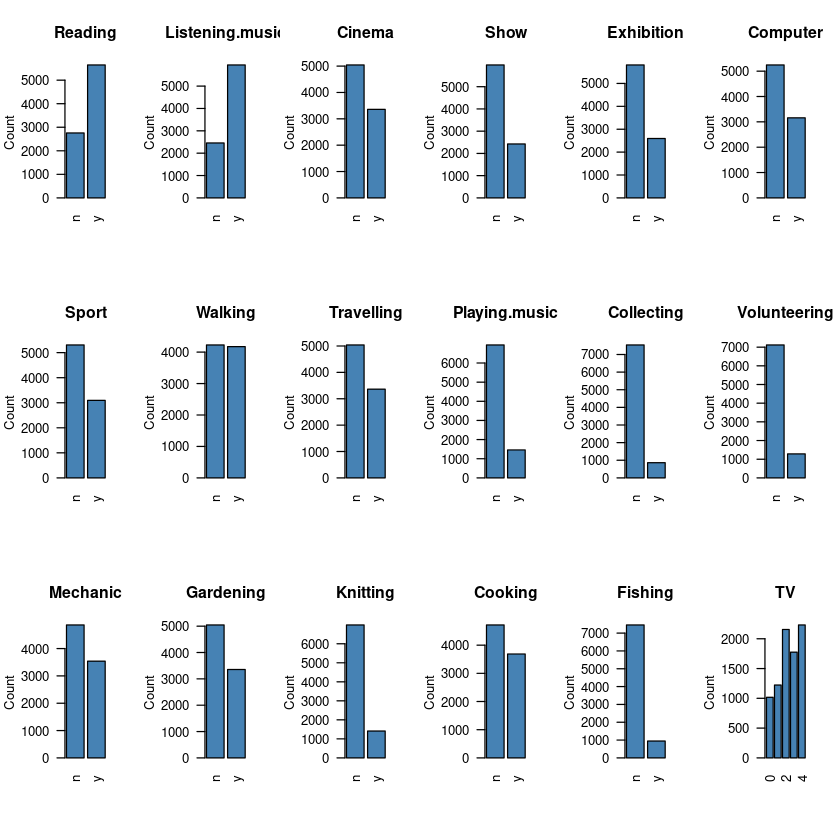

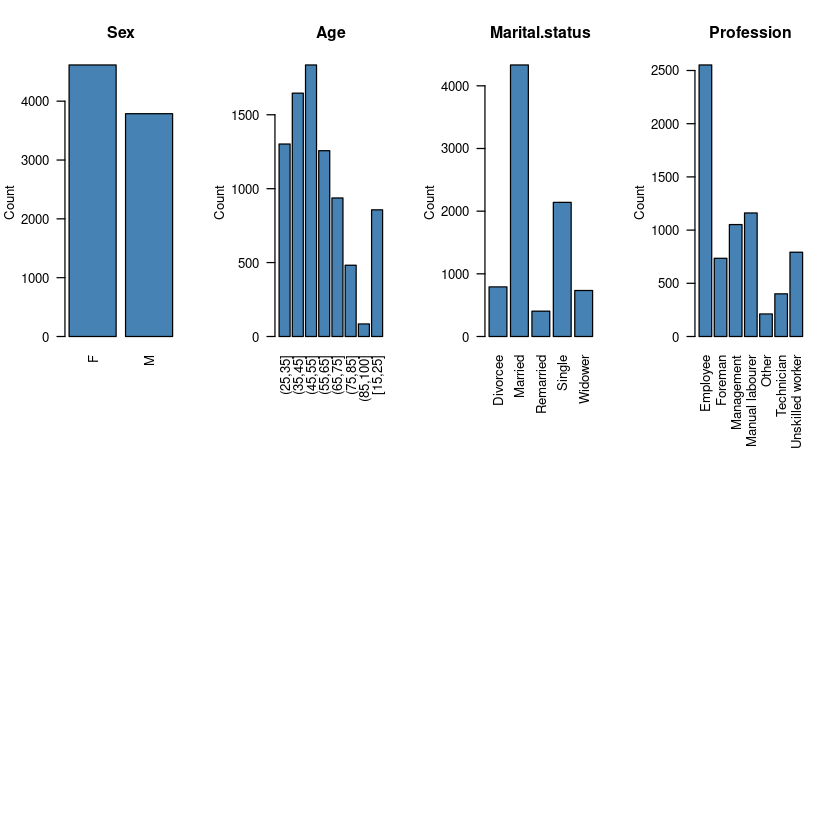

In [43]:
# solutions/mca/frequency.r
# Hobbies
par(mfrow=c(3,6))
I = 18
for (i in 1:I) {
  plot(hobbies[,i], main=colnames(hobbies)[i],
       ylab = "Count", col="steelblue", las = 2)
  }

# -- #

# Sociodemographic variables
par(mfrow=c(2,4))
I = 4
for (i in 18+1:I) {
  plot(hobbies[,i], main=colnames(hobbies)[i],
       ylab = "Count", col="steelblue", las = 2)
  }

In [ ]:
## TO BE COMPLETED ##

> _**Remark**: The graphs above can be used to identify variable categories with a very low frequency. These types of variables can distort the analysis and should be removed._

### Multiple Correspondence Analysis

With the `MCA` function of [`FactoMineR`](http://factominer.free.fr/index_fr.html), we can perform Multiple Correspondence Analysis.

In [46]:
res.mca = MCA(hobbies[c(1:18)], graph=FALSE)
print(res.mca)

**Results of the Multiple Correspondence Analysis (MCA)**
The analysis was performed on 8403 individuals, described by 18 variables
*The results are available in the following objects:

   name              description                       
1  "$eig"            "eigenvalues"                     
2  "$var"            "results for the variables"       
3  "$var$coord"      "coord. of the categories"        
4  "$var$cos2"       "cos2 for the categories"         
5  "$var$contrib"    "contributions of the categories" 
6  "$var$v.test"     "v-test for the categories"       
7  "$var$eta2"       "coord. of variables"             
8  "$ind"            "results for the individuals"     
9  "$ind$coord"      "coord. for the individuals"      
10 "$ind$cos2"       "cos2 for the individuals"        
11 "$ind$contrib"    "contributions of the individuals"
12 "$call"           "intermediate results"            
13 "$call$marge.col" "weights of columns"              
14 "$call$marge.li"  "weights 

##### <span style="color:purple">**Todo:** Visualize the percentages of inertia explained by each MCA dimensions.</span>

- What percentage of the variance explains the first two axes?
- How many dimensions would you recommend retaining?

eigenvalue percentage of variance cumulative percentage of variance
dim 1  0.19771155 16.946704               16.94670                        
dim 2  0.08064911  6.912781               23.85948                        
dim 3  0.07202181  6.173298               30.03278                        
dim 4  0.06287244  5.389066               35.42185                        
dim 5  0.05846003  5.010860               40.43271                        
dim 6  0.05581245  4.783924               45.21663                        
dim 7  0.05552338  4.759147               49.97578                        
dim 8  0.05330824  4.569278               54.54506                        
dim 9  0.05304441  4.546663               59.09172                        
dim 10 0.04913012  4.211153               63.30288                        
dim 11 0.04649329  3.985139               67.28802                        
dim 12 0.04507432  3.863513               71.15153                        
dim 13 0.04351305  3.729690               74.88122                        
dim 14 0.04336065  3.716628               78.59785                        
dim 15 0.04079999  3.497142               82.09499                        
dim 16 0.03798158  3.255564               85.35055                        
dim 17 0.03733490  3.200135               88.55069                        
dim 18 0.03621924  3.104506               91.65519                        
dim 19 0.03496817  2.997272               94.65246                        
dim 20 0.03234210  2.772180               97.42464                        
dim 21 0.03004581  2.575355              100.00000

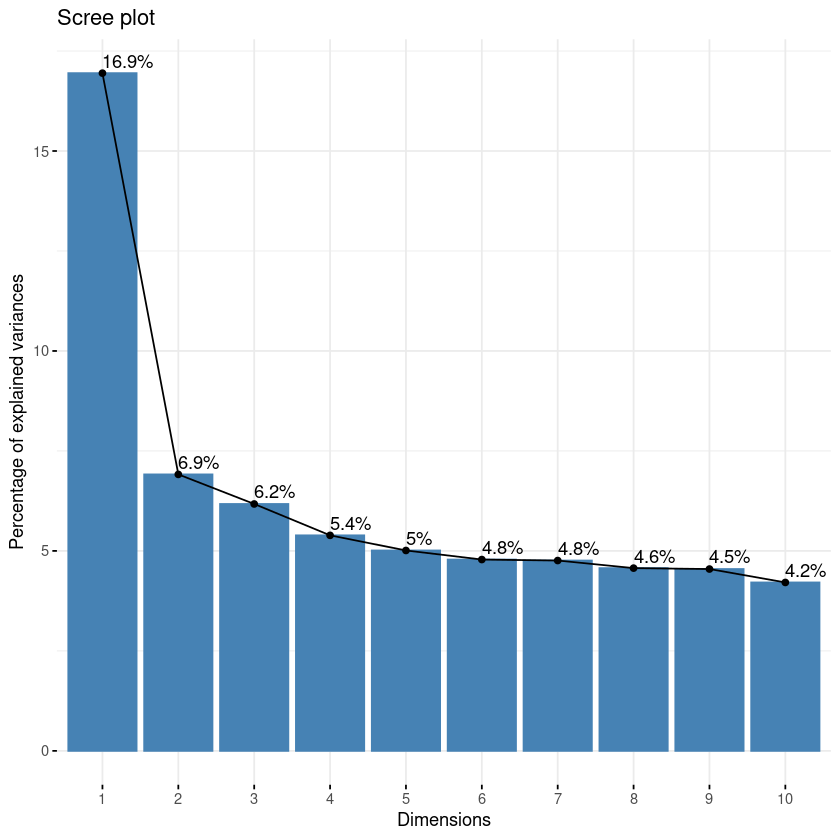

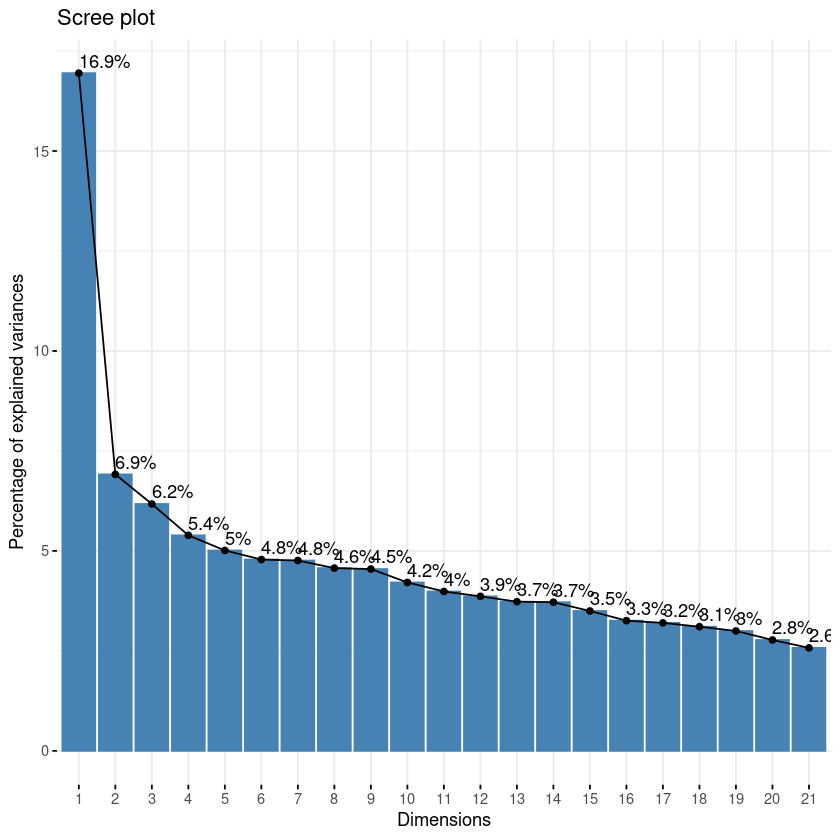

In [51]:
# solutions/mca/inertia.r
res.mca$eig

fviz_screeplot(res.mca, addlabels=TRUE)
fviz_screeplot(res.mca, addlabels=TRUE, ncp=21)

In [ ]:
## TO BE COMPLETED ##

##### <span style="color:purple">**Todo:** Visualize the mca biplot.</span>

- One may use the `fviz_mca_biplot` function.

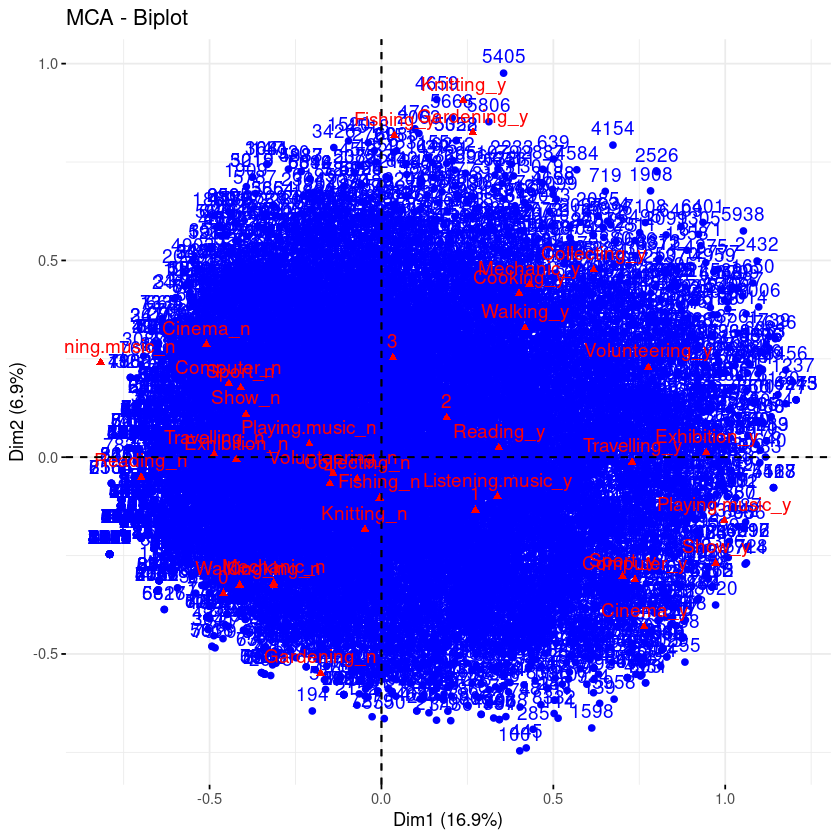

In [55]:
# solutions/mca/biplot.r
fviz_mca_biplot(res.mca)

# warning: do not use repel here !

In [ ]:
## TO BE COMPLETED ##

##### <span style="color:purple">**Question:** How do the different variables correlate with the different axes?</span>

- What can you conclude from this?
- One can refer to the `fviz_mca_var` function.

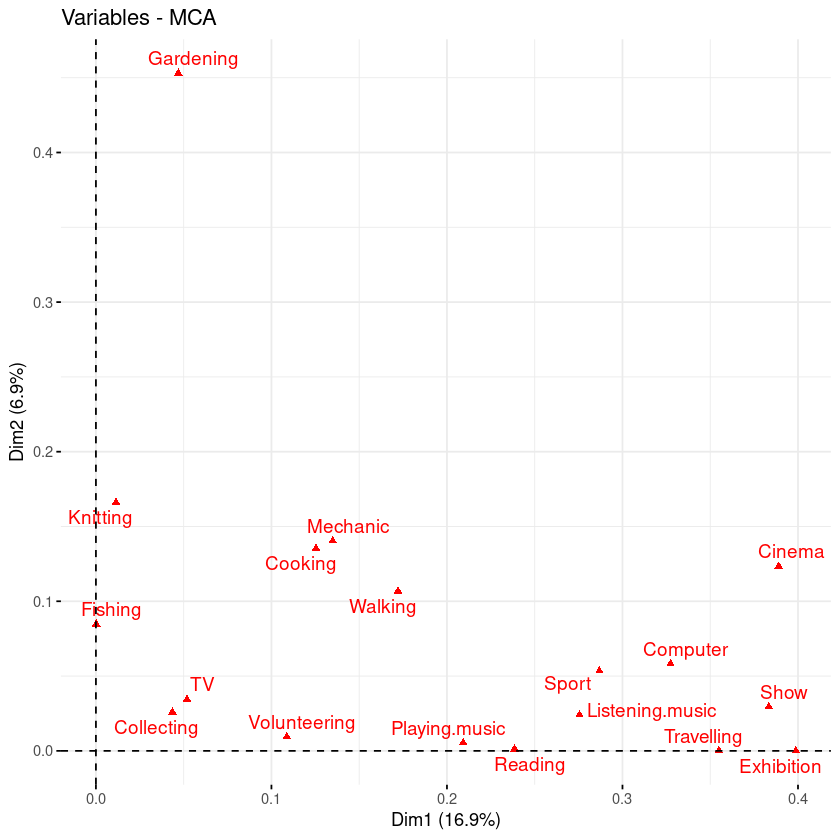

In [56]:
# solutions/mca/var_correlation.r
fviz_mca_var(res.mca, choice="mca.cor", repel=TRUE)

In [ ]:
## TO BE COMPLETED ##

### Quality of representation

The two dimensions 1 and 2 are sufficient to retain only $24\%$ of the total inertia (variation) contained in the data. 
It is reasonable to assume that not all points are displayed with the same quality in these first two dimensions.

##### <span style="color:purple">**Question:** Which hobby is best represented in Plan 1-2? Least well?</span>

In [63]:
# solutions/mca/representation.r
# cos2: quality of representation of rows
head(res.mca$var$cos2)

# --- #

i = c(1:2)

idx = which.max( rowSums(res.mca$var$cos2[,i]) )
hobby = row.names(res.mca$var$cos2)[idx]
if (idx >= nrow(res.mca$var$cos2)-4) {
    hobby = paste("cinema", hobby)
}
print(paste("The hobby best represented in Plan", i[1], '-', i[2], "is", hobby))

idx = which.min( rowSums(res.mca$var$cos2[,i]) )
hobby = row.names(res.mca$var$cos2)[idx]
if (idx >= nrow(res.mca$var$cos2)-4) {
    hobby = paste("TV", hobby)
}
print(paste("The hobby worst represented in Plan", i[1], '-', i[2], "is", hobby))

Dim 1     Dim 2       Dim 3       Dim 4       Dim 5      
Reading_n         0.2385181 0.001260776 0.103546767 0.007624229 0.004041665
Reading_y         0.2385181 0.001260776 0.103546767 0.007624229 0.004041665
Listening.music_n 0.2754854 0.024006349 0.022109556 0.143664135 0.001079192
Listening.music_y 0.2754854 0.024006349 0.022109556 0.143664135 0.001079192
Cinema_n          0.3890007 0.123401798 0.003011654 0.011458882 0.012575672
Cinema_y          0.3890007 0.123401798 0.003011654 0.011458882 0.012575672

[1] "The hobby best represented in Plan 1 - 2 is Cinema_y"
[1] "The hobby worst represented in Plan 1 - 2 is TV 4"


In [ ]:
## TO BE COMPLETED ##

##### <span style="color:purple">**Todo:** Visualize the variables quality representation.</span>

- Visualize the variable map, colored according the quality of representation $\to$ `fviz_mca_var`
- Create a bar plot of variable $\cos^2$ $\to$ `fviz_cos2`
- What do you think of the quality of the representation of the hobby of "watching TV"?

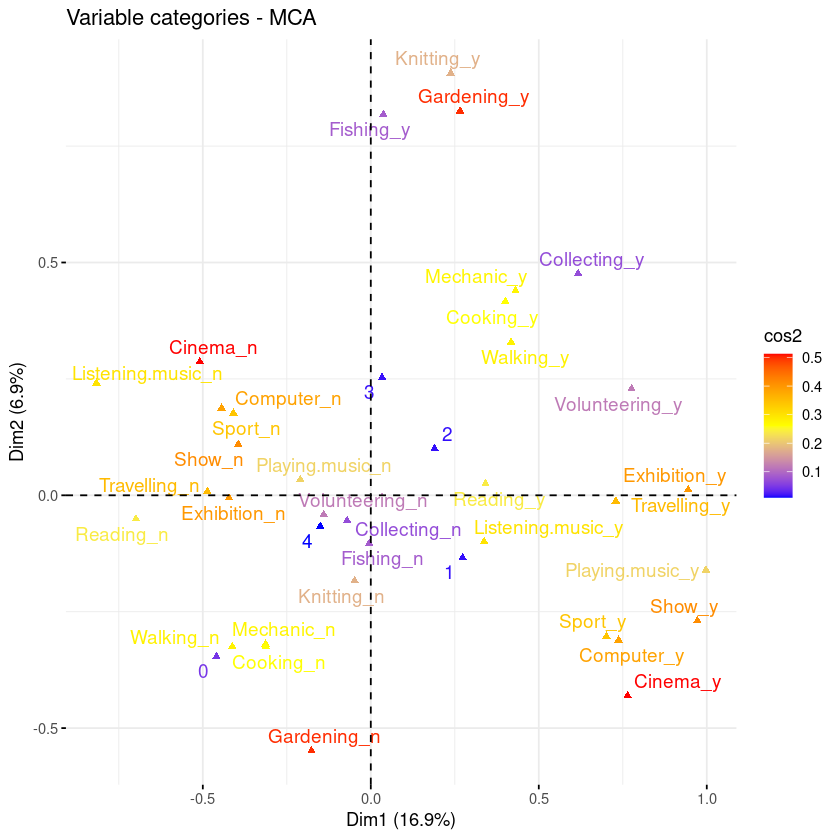

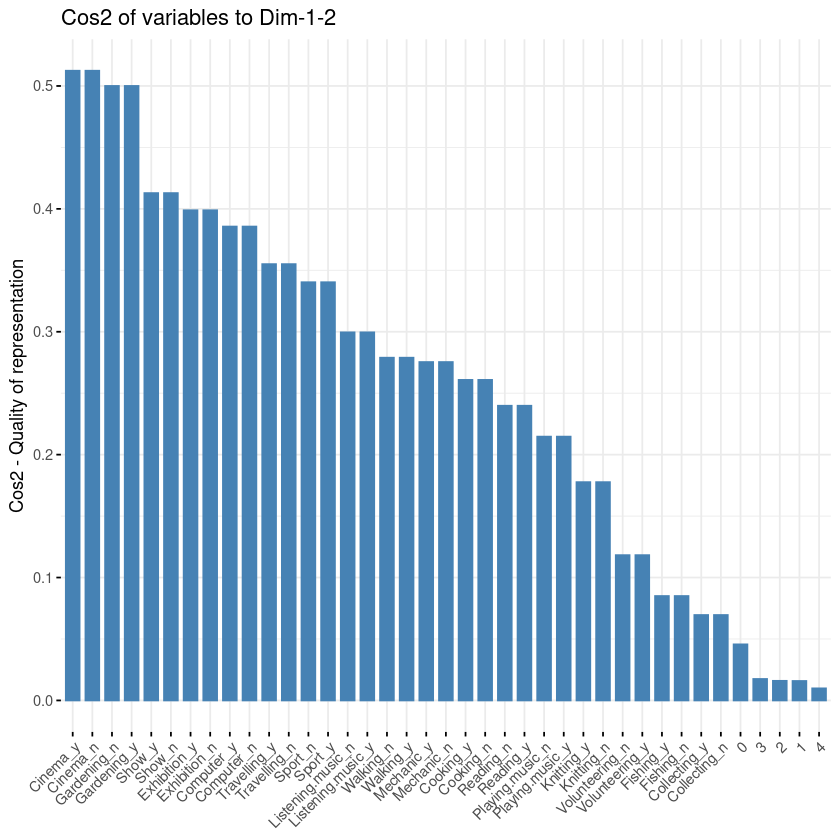

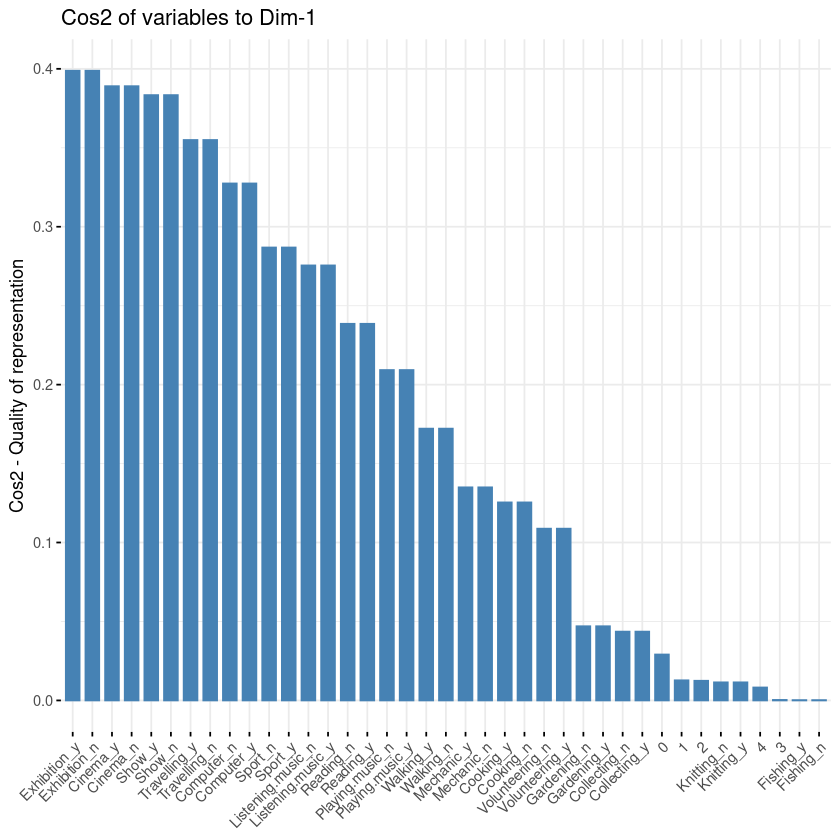

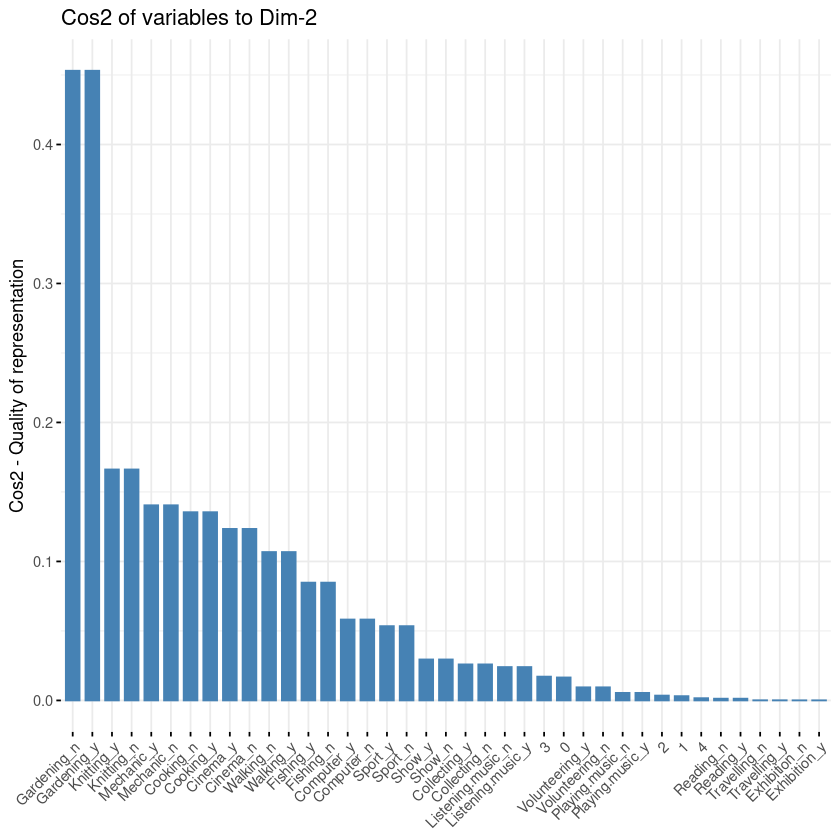

In [73]:
# solutions/mca/var_representation.r
# Color by cos2 values: quality on the factor map
fviz_mca_var(res.mca, col.var = "cos2",
             gradient.cols = c("blue", "yellow", "red"), 
             repel = TRUE )


# Cos2 of variable categories on Dim.1 and Dim.2
fviz_cos2(res.mca, choice = "var", axes = 1:2)

fviz_cos2(res.mca, choice = "var", axes = 1)

fviz_cos2(res.mca, choice = "var", axes = 2)

In [ ]:
## TO BE COMPLETED ##

##### <span style="color:purple">**Todo:** Would you say that all individuals are uniformly well represented?</span>

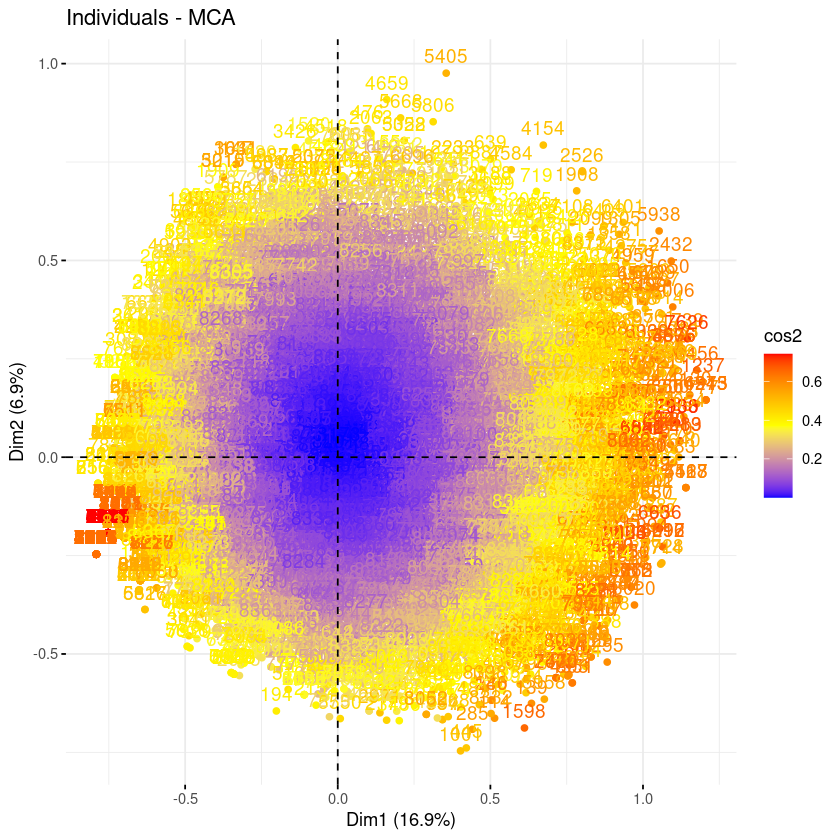

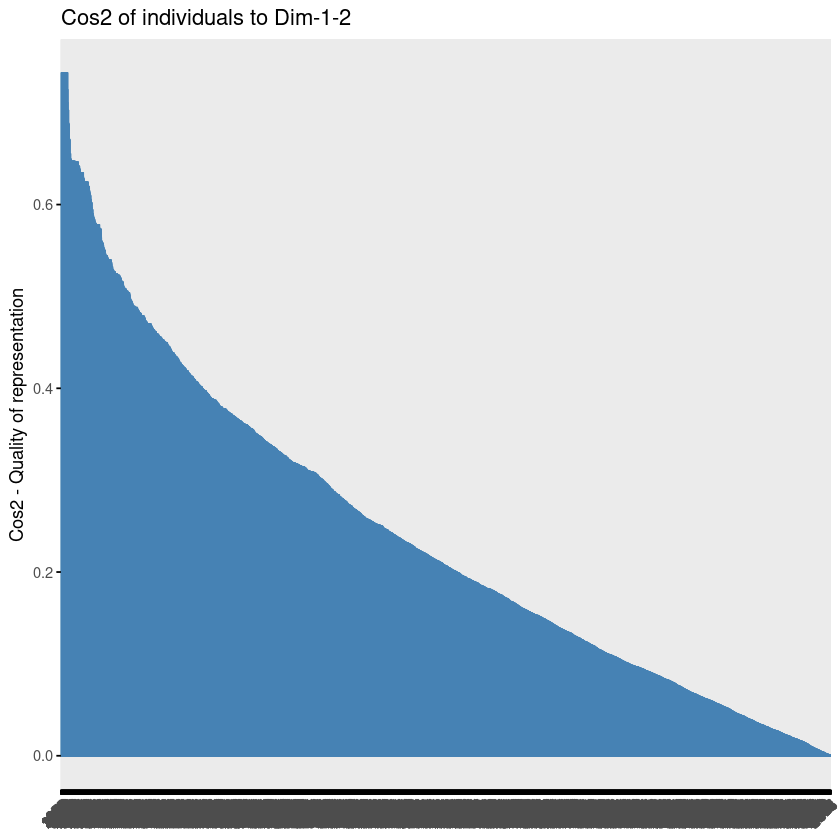

In [65]:
# solutions/mca/ind_representation.r
# Color by cos2 values: quality on the individual map
fviz_mca_ind(res.mca, col.ind = "cos2",
             gradient.cols = c("blue", "yellow", "red"))


# Cos2 of individuals on Dim.1 and Dim.2
fviz_cos2(res.mca, choice="ind", axes=1:2)

In [ ]:
## TO BE COMPLETED ##

### Contribution to the dimensions

##### <span style="color:purple">**Todo:** Evaluate the contribution of the various leisure activities to Axes 1 and 2 of the MCA.</span>

- Which 20 leisure activities contribute most to axis 1 of the MCA? 
- Which of these leisure activities make a significant contribution?
- Same questions for axis 2.

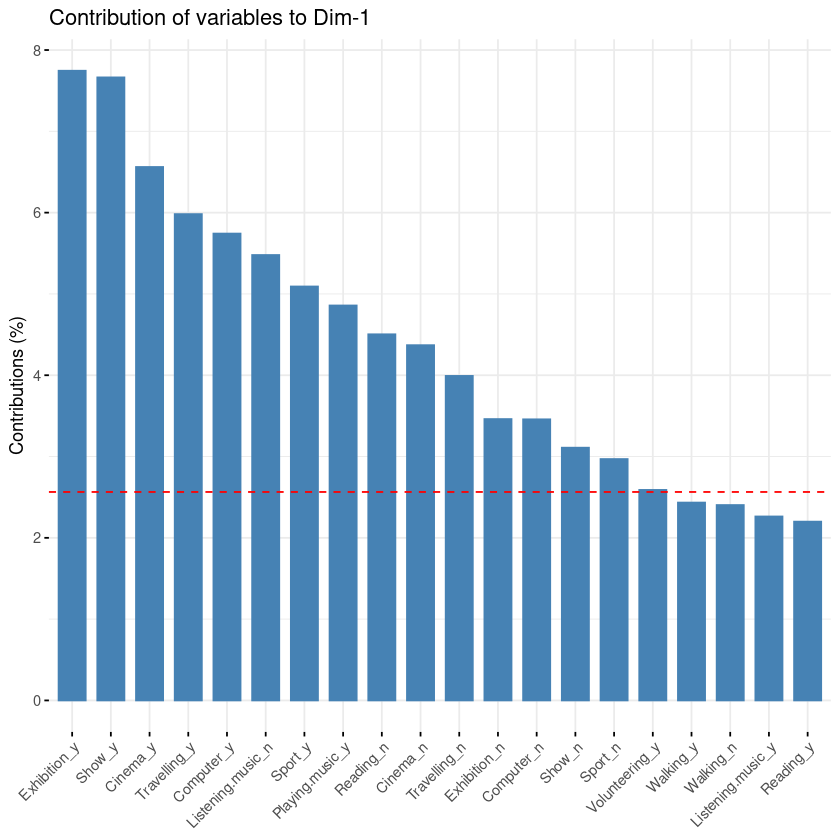

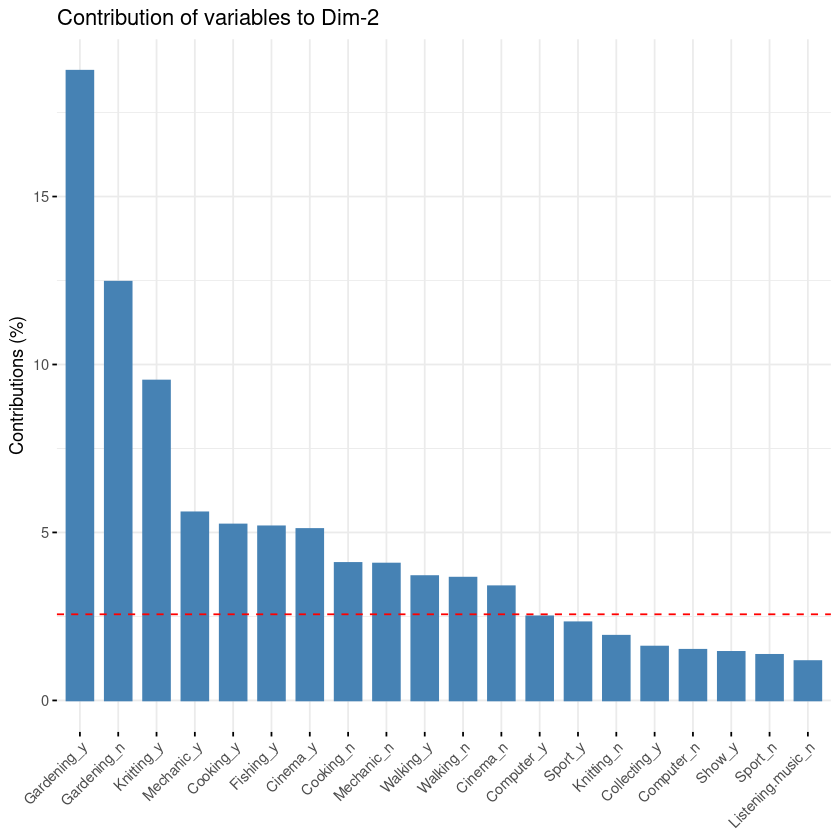

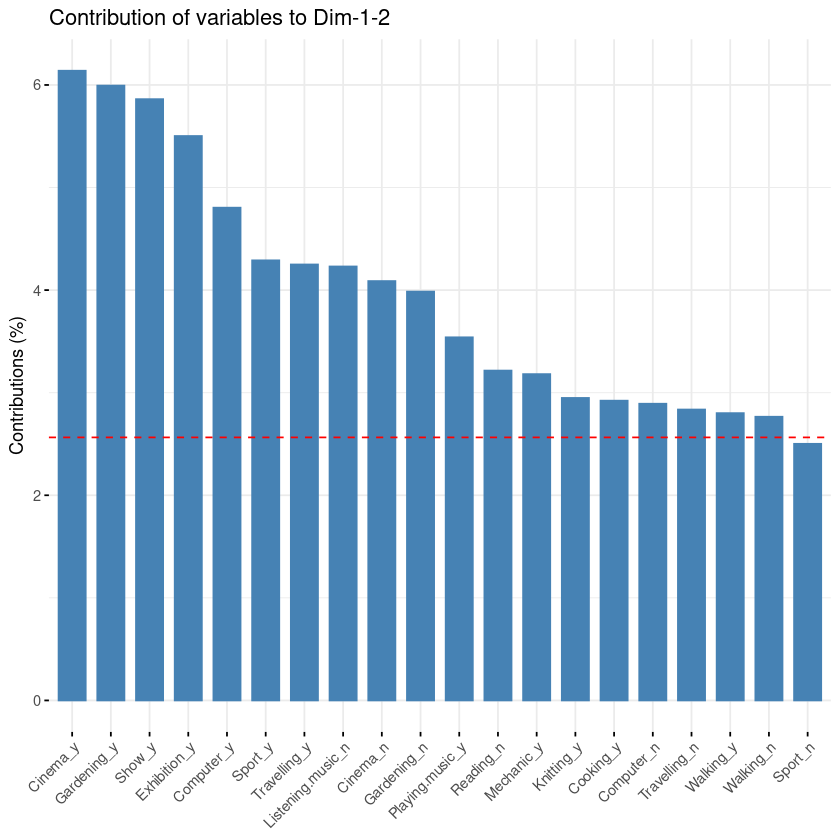

In [68]:
# solutions/mca/var_contrib.r
# Contributions of hobbies to dimension 1
fviz_contrib(res.mca, choice="var", axes=1, top=20)

# Contributions of hobbies to dimension 2
fviz_contrib(res.mca, choice="var", axes=2, top=20)

# Total contribution to dimension 1 and 2
fviz_contrib(res.mca, choice = "var", axes = 1:2, top = 20)

In [ ]:
## TO BE COMPLETED ##

The most important (or, contributing) hobbies can be highlighted on the scatter plot as follow:

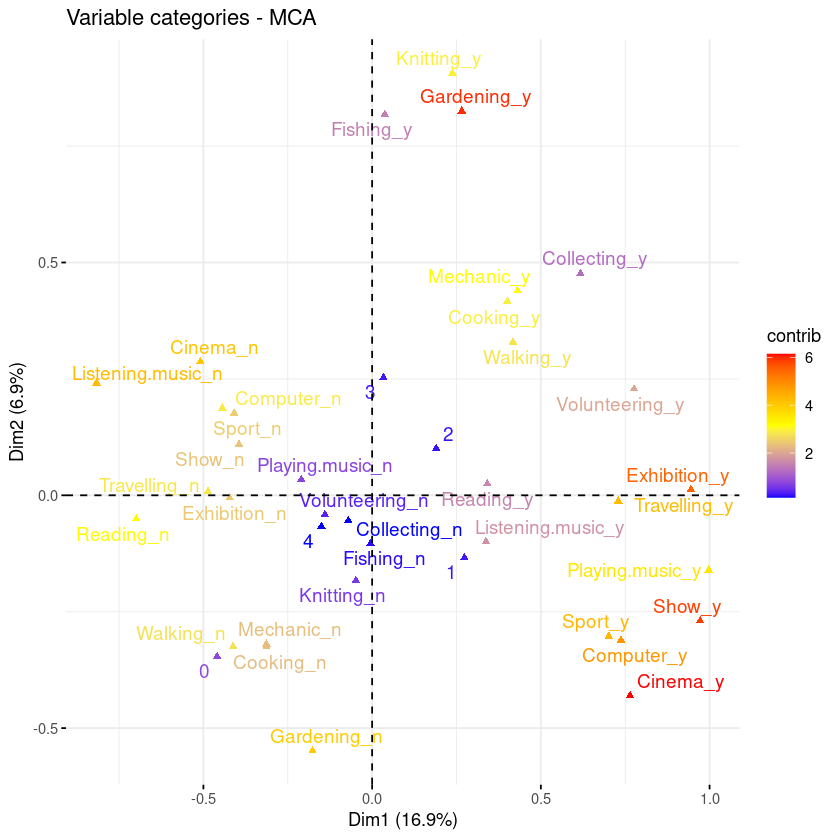

In [69]:
fviz_mca_var(res.mca, col.var = "contrib",
             gradient.cols = c("blue", "yellow", "red"), 
             repel = TRUE)

##### <span style="color:purple">**Question:** More generally, can we distinguish between involvement in leisure activities and not?</span>

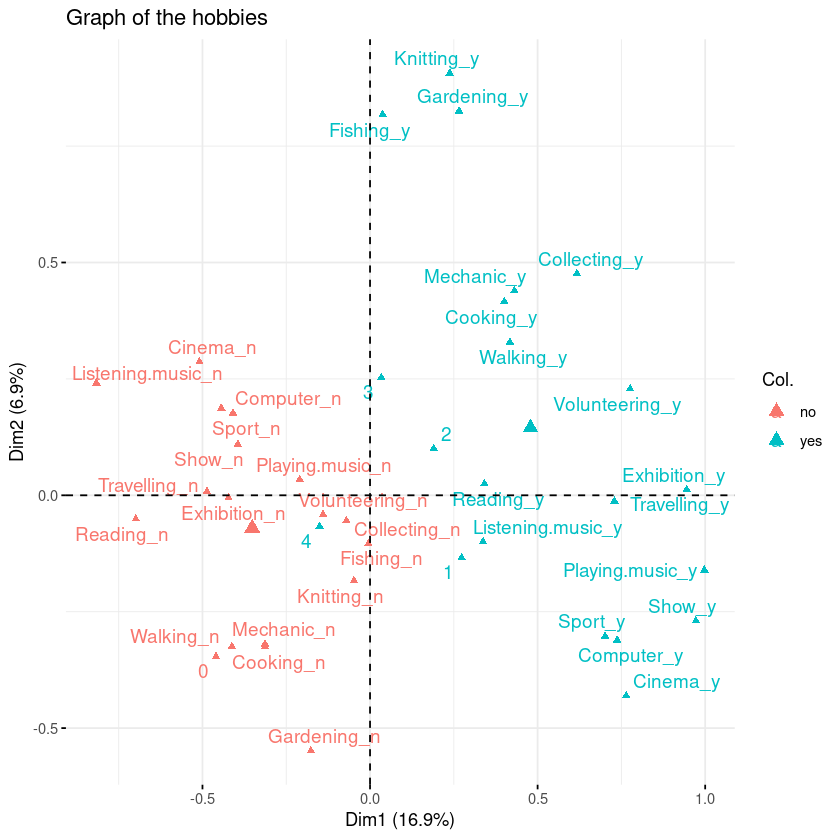

In [70]:
# solutions/mca/grouped_var.r
fviz_mca_var(res.mca, 
             col.var = c(rep(c("no","yes"),17),"no",rep("yes",4)),
             title = "Graph of the hobbies",
             repel = TRUE)

In [ ]:
## TO BE COMPLETED ##

##### <span style="color:purple">**Todo:** View the individuals on the main map of the MCA according to their hobbies.</span>

- We could concentrate on visiting exhibitions, gardening or watching TV.
- What do you think?

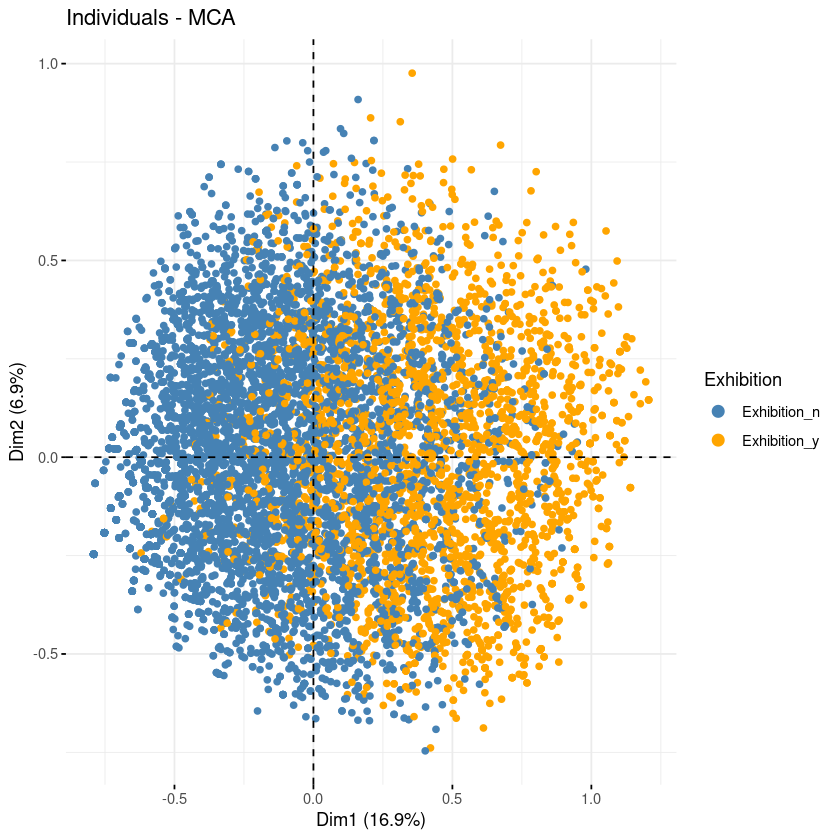

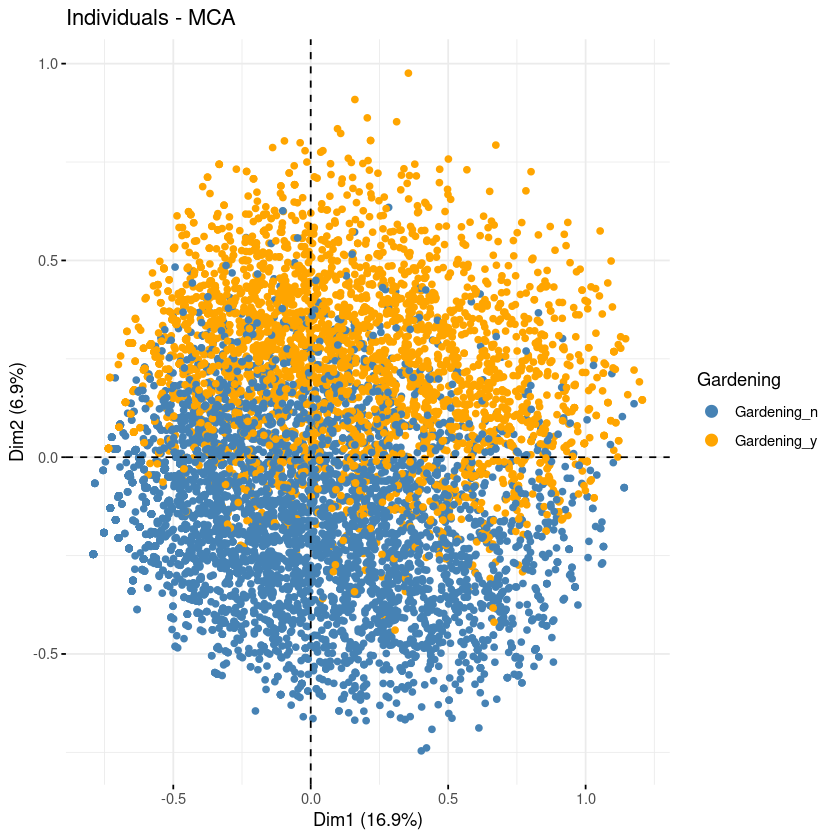

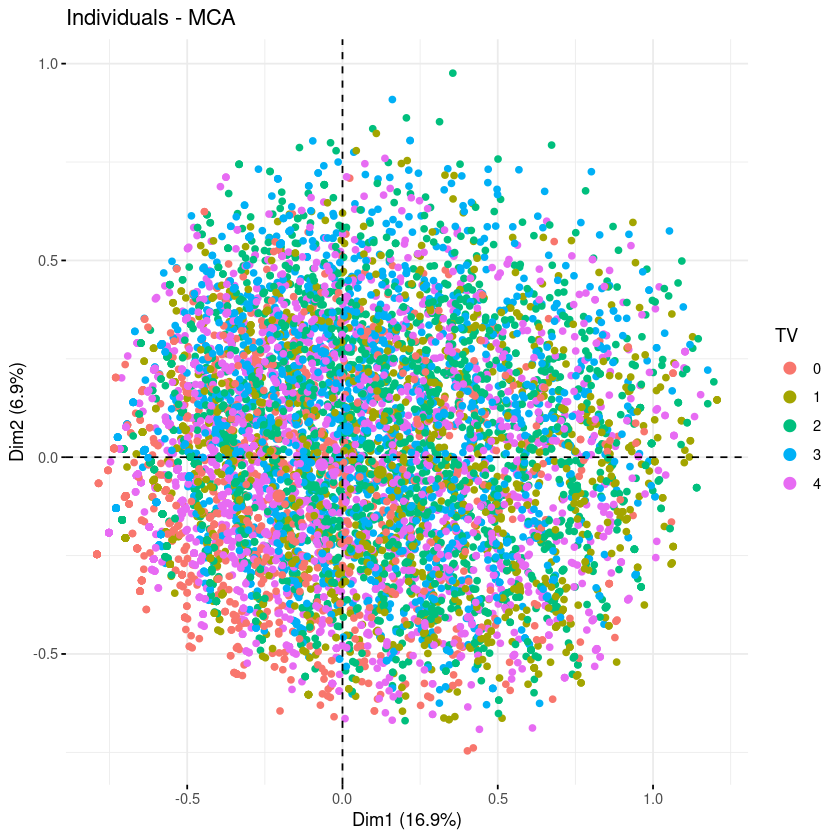

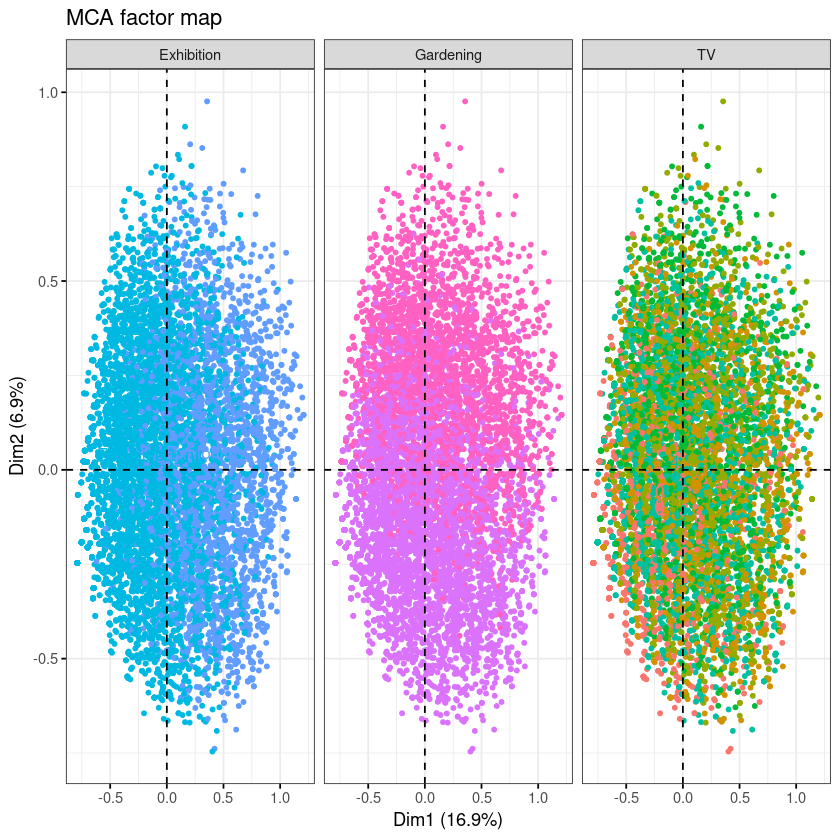

In [72]:
# solutions/mca/grouped_ind.r
fviz_mca_ind(res.mca, 
             label = "none", # hide individual labels
             habillage = "Exhibition", # color by groups 
             palette = c("steelblue", "orange"),
             #addEllipses = TRUE, ellipse.type = "confidence",
             ) 

fviz_mca_ind(res.mca, 
             label = "none", # hide individual labels
             habillage = "Gardening", # color by groups 
             palette = c("steelblue", "orange")
            ) 

fviz_mca_ind(res.mca, 
             label = "none", # hide individual labels
             habillage = "TV", # color by groups 
            ) 

# --- #

fviz_ellipses(res.mca, c("Exhibition", "Gardening", "TV"),
              geom = "point")

# plotellipses(res.mca, cex=0.2, magnify=12, keepvar=1:4)

In [ ]:
## TO BE COMPLETED ##

### Supplementary elements

We will now take into account the additional socio-demographic variables in our analysis

In [74]:
res.mca = MCA(hobbies, quali.sup=19:22, quanti.sup=23, graph=FALSE)

##### <span style="color:purple">**Question:** What do the graphs below represent? What can you tell from them?</span>

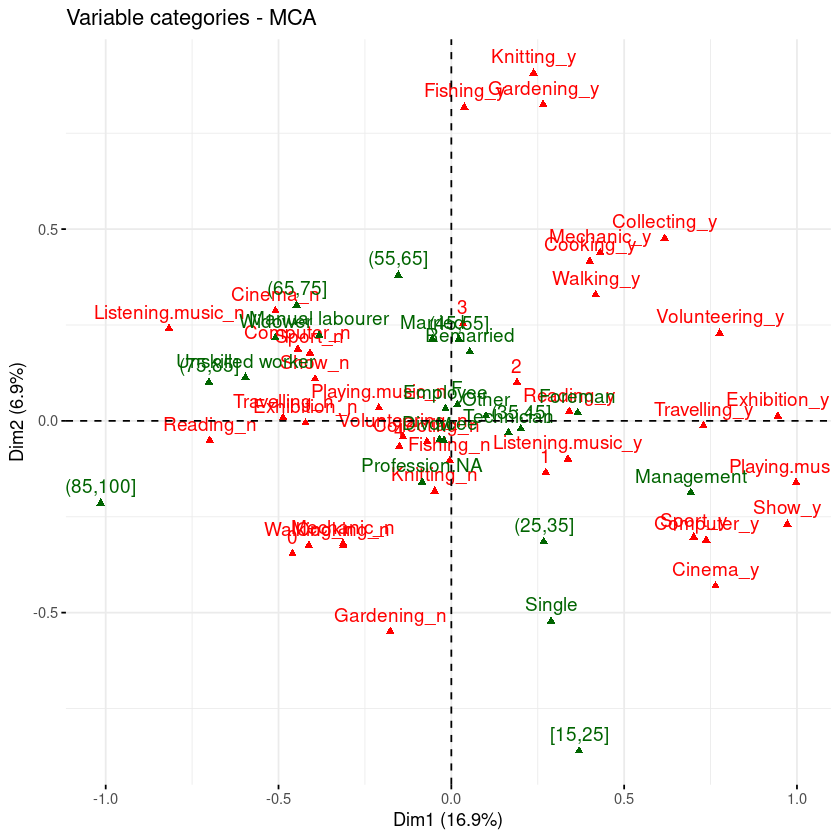

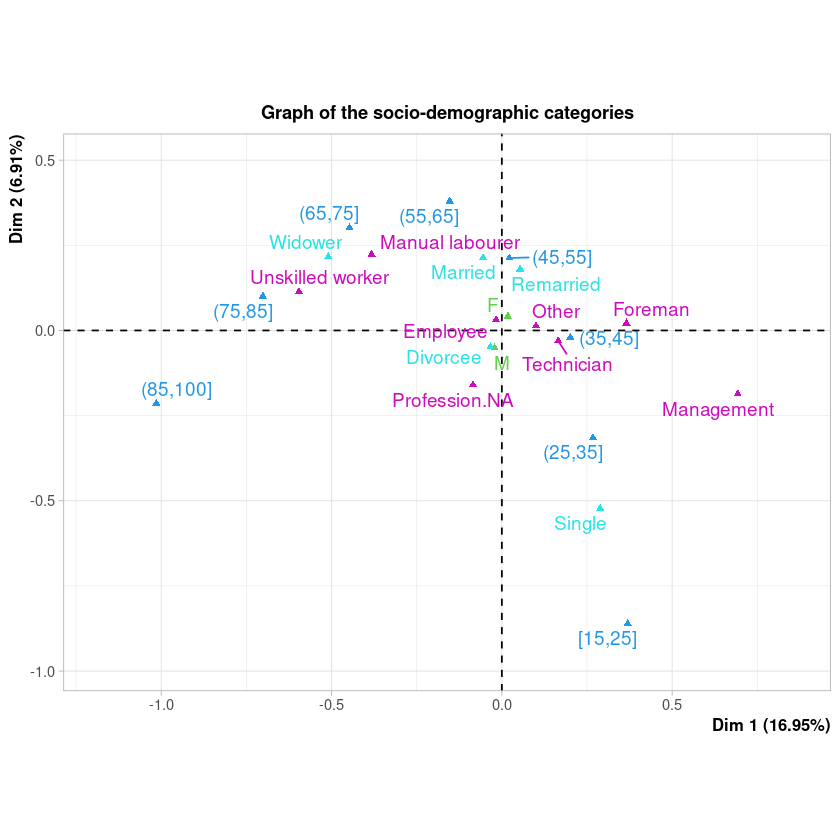

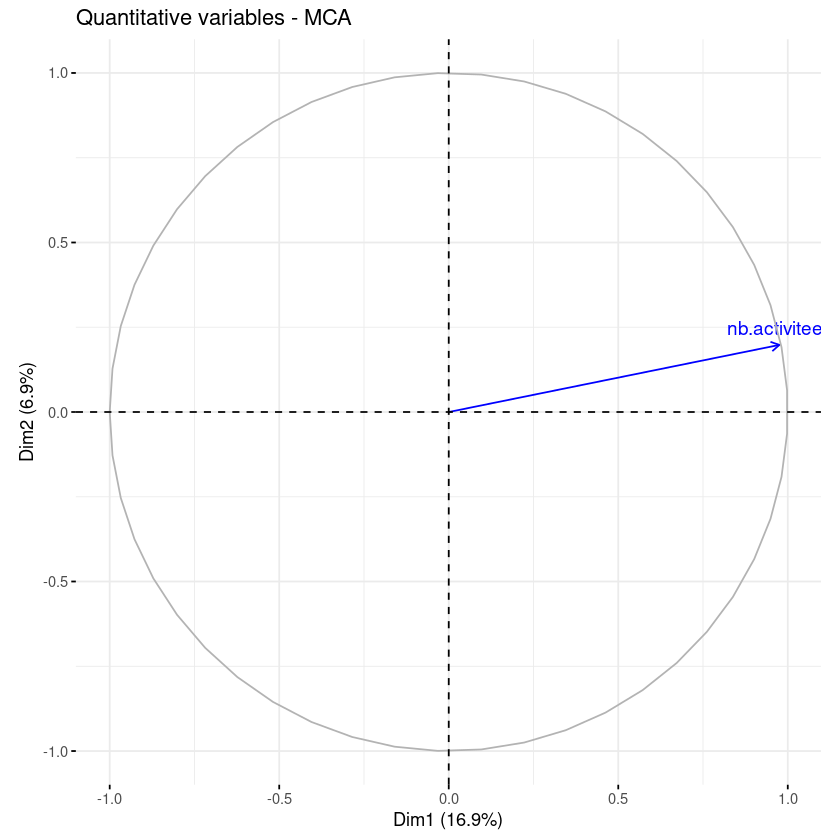

In [75]:
fviz_mca_var(res.mca)

# --- #

plot(res.mca, invisible=c("ind","var"),
     hab = "quali", 
     palette = palette(c("blue","maroon","darkgreen","black","red")), 
     title = "Graph of the socio-demographic categories")

# col = c( rep("Sex",length(levels(hobbies$Sex))), rep("Age",length(levels(hobbies$Age))), rep("Marital.status",length(levels(hobbies$Marital.status))), rep("Profession",length(levels(hobbies$Profession))) )
# fviz_mca_var(res.mca, invisible="var", col.var = col)

# --- #

fviz_mca_var(res.mca, choice = "quanti.sup")

##### <span style="color:purple">**Question:** Are the additional socio-demographic variables well represented in the MCA space?</span>

- Assessing the quality of the representation of additional qualitative variables.
- Draw a bar chart to compare these different qualities.

In [77]:
library(tidyverse)
library(ggpubr)

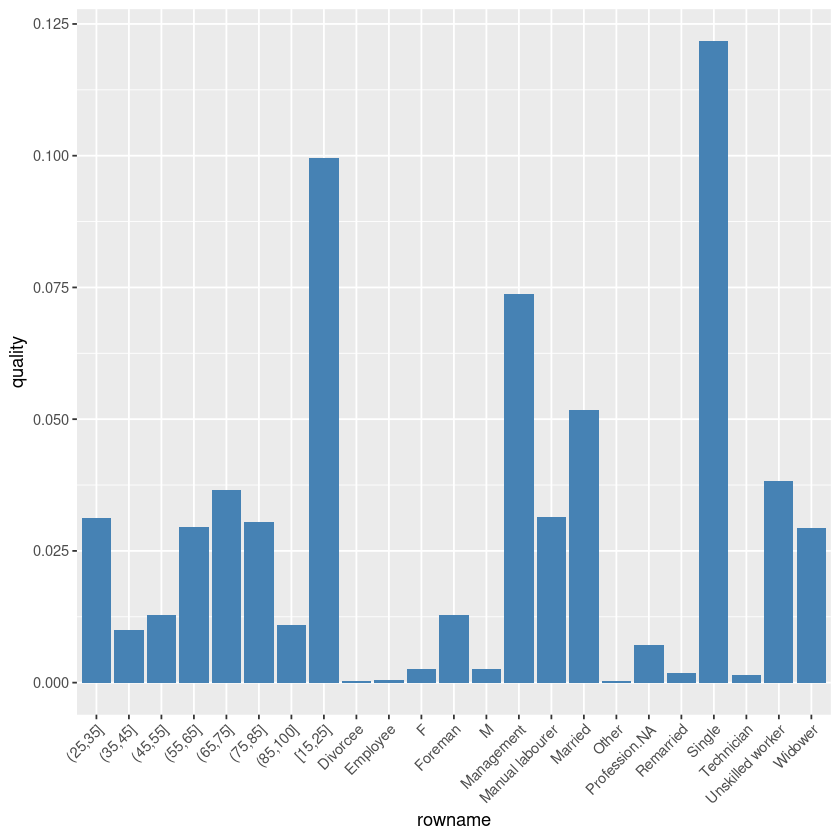

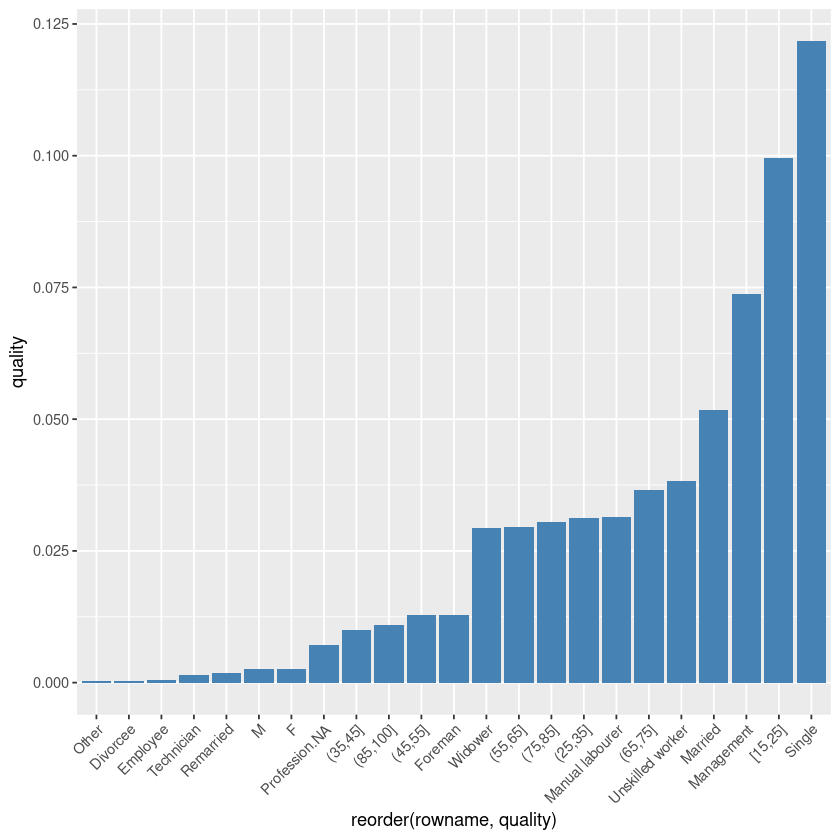

In [78]:
# solutions/mcs/sup_representation.r
df = data.frame(rowSums(res.mca$quali.sup$cos2[,c(1:2)]))
colnames(df) = "quality"
df = df %>% rownames_to_column()
#df

ggplot(df, aes(x=rowname, y=quality)) + 
    geom_col(fill='steelblue') +
    rotate_x_text(angle = 45)

# Order row names by quality values
ggplot(df, aes(x = reorder(rowname, quality), y = quality)) +
  geom_col(fill='steelblue')  +
  rotate_x_text(angle = 45)

In [ ]:
## TO BE COMPLETED ##

##### <span style="color:purple">**Question:** How are the additional variables correlated with dimensions 1 and 2?</span>

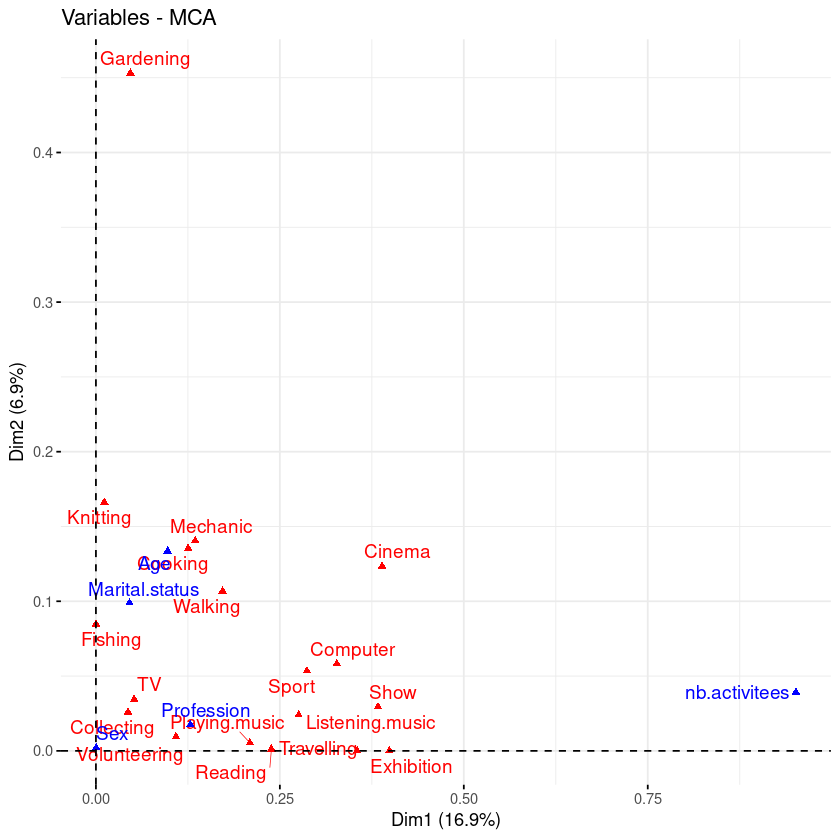

In [79]:
# solutions/mca/sup_correlation.r
fviz_mca_var(res.mca, choice="mca.cor", repel=TRUE)

In [ ]:
## TO BE COMPLETED ##